# extract Media from Ilias

In [80]:
def load(txt):
    with open(txt, "r",encoding = "UTF-8") as source:
        testo = source.readlines()
    return testo
data = load("token_Ilias.txt")

In [81]:
data[0:2]

['μῆνιν|n--s---fa-|μῆνις\n', 'ἄειδε|v-2spma---|ἀείδω\n']

In [82]:
import re
verbs = []
for d in data:
    infos = d.split("|")
    regex = r"(v).*"
    matches = re.match(regex, infos[1])
    if matches is not None:
        verbs.append(infos[2][:-1])

In [83]:
verbs[:2]

['ἀείδω', 'τίθημι']

In [84]:
# Load ilias
with open("HomerGesamt.txt","r",encoding="UTF-8") as il:
    homer = il.read()

In [100]:
import re
regex = r"\n"
homer = re.sub(regex, " ",homer, re.MULTILINE) # delete row break
homer = re.sub("n", "",homer, re.MULTILINE) # delete row break
homer = re.sub(r";","?",homer,re.MULTILINE) # change question mark
homer = re.sub(r"(\d+(\.\d+)?)","",homer,0,re.MULTILINE) # delete verse number
homer = re.sub(r"\w(·)","",homer,0,re.MULTILINE)
homer = re.sub(r'(\.|,|;|!|\")',"",homer,re.MULTILINE)


In [101]:
homer[:340]

'μῆνιν ἄειδε θεὰ Πηληϊάδεω Ἀχιλῆος οὐλομένην ἣ μυρίʼ Ἀχαιοῖς ἄλγεʼ ἔθηκε πολλὰς δʼ ἰφθίμους ψυχὰς Ἄϊδι προΐαψεν ἡρώων αὐτοὺς δὲ ἑλώρια τεῦχε κύνεσσιν  οἰωνοῖσί τε πᾶσι Διὸς δʼ ἐτελείετο βουλή ἐξ οὗ δὴ τὰ πρῶτα διαστήτην ἐρίσαντε Ἀτρεΐδης τε ἄναξ ἀνδρῶν καὶ δῖος Ἀχιλλεύς  τίς τʼ ἄρ σφωε θεῶν ἔριδι ξυνέηκε μάχεσθαι? Λητοῦς καὶ Διὸς υἱός ὃ γὰ'

In [102]:
with open('stopwords.txt',"r",encoding="UTF-8") as stopw:
    stopwords = stopw.read()
stopwords = stopwords.split('\n')
stopwords.extend('.')
stopwords.extend(',')
stopwords.extend('“')
stopwords.extend('·')
stopwords[-1]

'·'

In [103]:
from nltk.tokenize import word_tokenize
tokens = word_tokenize(homer)

In [104]:
tokens = [w for w in tokens if w not in stopwords]

In [105]:
len(tokens)

421398

In [106]:
# find 5 neighbours of erhomai

def allIndices(sent, wanted):
    from more_itertools import locate
    indices = list(locate(sent, lambda a : a == wanted))
    return indices

def find_neighbours(corpus,target_list,window=9):
    context = []
    # iterate per verb_form
    for verb_form in list(target_list):
        # iterate per sentence
        indices = allIndices(corpus,verb_form)
        for occurrence in indices:
            for j in range(max(occurrence-window,0),min(occurrence+window, len(corpus))):
                if j not in indices:
                    context.append(corpus[j])
    return context
                                
                
    

# Single verbs analysis

In [107]:
import collections
from collections import Counter
corpus = tokens

In [108]:
# escape
aleinw = set()
aleomai = set()
erukw = set()
for d in data:
    el = d.split('|')
    if el[2] == "ἀλεείνω\n":
        aleinw.add(el[0])
    if el[2] == 'ἀλέομαι\n':
        aleomai.add(el[0])
    if el[2] == 'ἐρύκω\n':
        erukw.add(el[0])

In [109]:
aleinw_c = Counter(find_neighbours(corpus,aleinw))
aleomai_c = Counter(find_neighbours(corpus,aleomai))
erukw_c = Counter(find_neighbours(corpus,erukw))

In [110]:
from pprint import pprint
pprint(aleinw_c.most_common(5))

[('ἂψ', 13), ('ἑτάρων', 12), ('εἰς', 12), ('ἔθνος', 12), ('ἐχάζετο', 12)]


In [111]:
print(f"Aleinw: {sum(aleinw_c.values())}\naleomai: {sum(aleomai_c.values())}\nerukw: {sum(erukw_c.values())}\n")

Aleinw: 850
aleomai: 1003
erukw: 1564



In [112]:
pprint(aleinw_c.most_common(100), compact = True)

[('ἂψ', 13), ('ἑτάρων', 12), ('εἰς', 12), ('ἔθνος', 12), ('ἐχάζετο', 12),
 ('κῆρʼ', 12), ('μιν', 11), ('ἐν', 10), ('καί', 9), ('ὡς', 7), ('ῥʼ', 6),
 ('ἔνθα', 6), ('οὐκ', 6), ('ἀλλʼ', 5), ('ὅτε', 5), ('κατὰ', 5), ('φάτο', 5),
 ('τινα', 4), ('θεοπροπίην', 4), ('τινά', 4), ('πὰρ', 4), ('Ζηνὸς', 4),
 ('ἐπέφραδε', 4), ('πότνια', 4), ('μήτηρ', 4), ('ἔγχος', 4), ('ῥα', 4),
 ('δώματος', 4), ('ὑψηλοῖο', 4), ('βίας', 4), ('ἀνέμων', 4), ('ἑ', 4),
 ('τοὶ', 4), ('Ἀχαιῶν', 4), ('Ζεὺς', 4), ('ἐνὶ', 3), ('κύμασιν', 3),
 ('ἐλλάβετʼ', 3), ('αὐτῆς', 3), ('μέσσῃ', 3), ('καθῖζε', 3), ('τέλος', 3),
 ('θανάτου', 3), ('ἐφόρει', 3), ('μέγα', 3), ('κῦμα', 3), ('ῥόον', 3),
 ('κύνες', 3), ('αἵδε', 3), ('καθεψιόωνται', 3), ('ἅπασαι', 3), ('τάων', 3),
 ('νῦν', 3), ('λώβην', 3), ('αἴσχεα', 3), ('πόλλʼ', 3), ('ἐάας', 3),
 ('νίζει', 3), ('ἐμὲ', 3), ('ἀέκουσαν', 3), ('ἄνωγε', 3), ('ῥαπτὸν', 3),
 ('ἀεικέλιον', 3), ('περὶ', 3), ('κνήμῃσι', 3), ('βοείας', 3), ('κνημῖδας', 3),
 ('ῥαπτὰς', 3), ('δέδετο', 3), ('γραπτῦς', 3),

In [113]:
pprint(aleomai_c.most_common(100), compact=True)

[('ἀλλʼ', 15), ('γὰρ', 15), ('ἄντα', 14), ('ἰδὼν', 14), ('χάλκεον', 14),
 ('δουρὶ', 12), ('ἀκόντισε', 10), ('ἦ', 10), ('ἔγχος', 9), ('ἔγχο', 9),
 ('γάρ', 9), ('κῆρα', 8), ('μέλαιναν', 8), ('Ἕκτωρ', 7), ('οὔ', 6), ('οὐδʼ', 6),
 ('φαεινῷ', 6), ('δόρυ', 6), ('μακρὸν', 6), ('Διὸς', 6), ('οὔτʼ', 6), ('γʼ', 6),
 ('κεν', 5), ('μάλα', 5), ('οὔτε', 5), ('μὴ', 5), ('με', 5), ('βέλος', 5),
 ('πως', 5), ('κέν', 5), ('Τρῶες', 4), ('ὄφρα', 4), ('πρόσσω', 4),
 ('κατέκυψε', 4), ('ἐξόπιθεν', 4), ('αὖτʼ', 4), ('φαειν', 4), ('ῥα', 4),
 ('ὣς', 4), ('φάτο', 4), ('ἀνεχάζετο', 4), ('ὀπίσσω', 4), ('μῆνιν', 4),
 ('ἑκατηβόλου', 4), ('Ἀπόλλωνος', 4), ('πολλὸν', 4), ('ἐν', 4), ('ἠρήρειστ', 4),
 ('ἀντικρὺ', 4), ('παραὶ', 4), ('λαπάρην', 4), ('διάμησε', 4), ('χιτῶνα', 4),
 ('ἐκλίνθη', 4), ('ἐς', 4), ('νοέω', 3), ('κακὸν', 3), ('ὔμμιν', 3),
 ('ἐρχόμενον', 3), ('τις', 3), ('ὑπεκφύγοι', 3), ('μνηστήρων', 3), ('δῶμα', 3),
 ('κάτʼ', 3), ('ἀντιθέου', 3), ('Ὀδυσῆος', 3), ('ὑβρίζοντες', 3), ('ἀ', 3),
 ('τυτθό', 3), ('τ', 3

In [114]:
pprint(erukw_c.most_common(100), compact=True)

[('κʼ', 16), ('ἵππους', 15), ('γὰρ', 14), ('λαὸν', 13), ('περ', 13), ('μὴ', 13),
 ('ἔπειτα', 12), ('μιν', 12), ('ἐπὶ', 10), ('ἐν', 10), ('αὐτοῦ', 10),
 ('γάρ', 10), ('τις', 10), ('ἀλλʼ', 9), ('ἀπὸ', 9), ('οὐδʼ', 9), ('ἐγὼ', 9),
 ('οὔ', 9), ('ὣς', 8), ('ἦ', 8), ('κατὰ', 8), ('μοι', 8), ('ἠδὲ', 8), ('ἐξ', 7),
 ('αὐτὰρ', 7), ('δή', 7), ('μή', 7), ('τ', 7), ('δῶρα', 6), ('ῥʼ', 6),
 ('εἴ', 6), ('μʼ', 6), ('σὺν', 6), ('τεύχεσι', 6), ('τάφρῳ', 6), ('ὡς', 6),
 ('δῖα', 6), ('θεάων', 6), ('σπέσσι', 6), ('γλαφυροῖσι', 6), ('λιλαιομένη', 6),
 ('εἰς', 6), ('κακὰ', 6), ('γε', 5), ('μάλα', 5), ('ἄγε', 5), ('ἦλθε', 5),
 ('φώνησέν', 5), ('με', 5), ('πρῶτον', 5), ('Ἕκτορι', 5), ('ἄντυγος', 4),
 ('ἡνία', 4), ('πάλιν', 4), ('ἔνθʼ', 4), ('ὠκέας', 4), ('χαμᾶζε', 4),
 ('οὐδέ', 4), ('ἀέκοντας', 4), ('δὴ', 4), ('ἐλεύσεται', 4), ('γῆ', 4),
 ('φυσίζοος', 4), ('κρατερόν', 4), ('ὅρμαινε', 4), ('μένω', 4), ('ἵππων', 4),
 ('γέρων', 4), ('ἠμείβετʼ', 4), ('πολέμοιο', 4), ('πε', 4), ('πόσιν', 4),
 ('σὺ', 4), ('διὰ', 4)

In [130]:
def extract_neighbours(verb, corpus = corpus,window=5,print_common = True,hmany=100):
    verb_forms = set()
    for d in data:
        el = d.split('|')
        if el[2] == verb+"\n":
            verb_forms.add(el[0])
    context = Counter(find_neighbours(corpus,verb_forms,window = window))
    if print_common:
        pprint(context.most_common(hmany), compact=True)
    return (context,verb_forms)

In [131]:
euhomai = extract_neighbours("εὔχομαι")

[('εἶναι', 57), ('γένος', 20), ('ὣς', 19), ('Διὶ', 19), ('ἀλλʼ', 17),
 ('Ποσειδάωνι', 15), ('ἐξ', 14), (';', 13), ('ἔπειτα', 13), ('χεῖρας', 12),
 ('ἐκ', 11), ('γε', 11), ('Διὸς', 10), ('ἐγὼ', 10), ('μέγα', 10),
 ('ἀνασχώ', 10), ('Ἀχαιῶν', 9), ('εἶνα', 9), ('γʼ', 9), ('υἱός', 9),
 ('ἀγορεύσω', 9), ('εἶναι.', 9), ('”', 9), ('οὐ', 9), ('μέν', 8), ('κούρῃ', 8),
 ('ἄνακτ', 8), ('ἄνακτι', 8), ('ὃς', 8), ('υἱὸς', 8), ('ἦ', 8), ('νῦν', 7),
 ('δὴ', 7), ('ἐπὶ', 7), ('σύ', 7), ('πατρὶ', 7), ('μέλλεις', 7), ('κατὰ', 7),
 ('εἰς', 7), ('τις', 6), ('ἄριστος', 6), ('αὖτε', 6), ('μάλα', 6), ('ποῦ', 6),
 ('Ἀγχιάλοιο', 6), ('δαΐφρονος', 6), ('ἀτὰρ', 6), ('Ταφίοισι', 6), ('πατὴρ', 6),
 ('ἐμὸς', 6), ('Κρητάων', 6), ('εὐρειάων', 6), ('πολλὰ', 6), ('ἱκέτης', 6),
 ('ἔμμεναι', 6), ('Ἀπόλλων', 6), ('πάρος', 6), ('κλῦθι', 6), ('ἐπεὶ', 6),
 ('μετὰ', 6), ('γὰρ', 6), ('Παλλὰς', 5), ('Ἀθήνη', 5), ('ῥʼ', 5), ('αἴ', 5),
 ('ἄγε', 5), ('φησὶ', 5), ('καί', 5), ('ἐνὶ', 5), ('Μέντης', 5), ('θυμὸν', 5),
 ('πάντʼ', 5), ('ἔφ

## Analyzer

In [65]:
ilias_dict = {}
for d in data:
    el = d.split('|')
    if el[0] in ilias_dict.keys():
        continue
    else:
        ilias_dict[el[0]] = el[1]

In [133]:
class Analyzer():
    
    def __init__(self,verb):
        self.verb = verb
        self.pos = []
        self.tense = []
        self.voice = []
        self.case = []
        self.mood = []
        self.context = None
        self.context_words = 0
        self.v_forms = set()
        
    def __repr__(self):
        print(f"Analyzer für das Verb {self.verb}")
        
    def extract_context(self):
        neighbours = extract_neighbours(self.verb,print_common=False)
        self.context = neighbours[0]
        self.v_forms = neighbours[1]
    
    def analyze(self):
        if self.context == None:
            self.extract_context()
        self.context_words = sum(self.context.values())
        for w in list(self.context):
            if w in ilias_dict.keys() and len(ilias_dict[w]) > 8 :
                morpho_info = ilias_dict[w]
                self.pos.append(morpho_info[0])
                if morpho_info[4] != "-":
                    self.tense.append(morpho_info[4])
                if morpho_info[5] != "-":
                    self.mood.append(morpho_info[5])
                if morpho_info[6] != "-":
                    self.voice.append(morpho_info[6])
                if morpho_info[8] != "-":
                    self.case.append(morpho_info[8])
        
    def get_info(self,category,pr = False):
        cat_c = Counter(category)
        cat_c_normalized = {}
        for w,c in cat_c.items():
            cat_c_normalized[w] = round(c/self.context_words,3)
            if pr:
                print(f"{w} : {cat_c_normalized[w]}")
        return cat_c_normalized
            
    def get_pos(self,pr=False):
        return self.get_info(self.pos,pr)
        
    def get_tense(self,pr=False):
        return self.get_info(self.tense,pr)
        
    def get_mood(self,pr=False):
        return self.get_info(self.mood,pr)
    
    def get_voice(self,pr=False):
        return self.get_info(self.voice,pr)
    
    def get_case(self,pr=False):
        return self.get_info(self.case,pr)
    
    def get_all(self,pr=True):
        print("POS:\n")
        self.get_pos(pr=pr)
        print("\nTENSE\n")
        self.get_tense(pr=pr)
        print("\nVOICE\n")
        self.get_voice(pr=pr)
        print("\nMOOD\n")
        self.get_mood(pr=pr)
        print("\nCASE\n")
        self.get_case(pr=pr)
        
        


        
        
        

In [134]:
del(euhomai)

In [135]:
euhomai = Analyzer("εὔχομαι")
euhomai.analyze()
euhomai.get_all(pr=True)

POS:

n : 0.067
v : 0.05
c : 0.006
d : 0.022
g : 0.008
a : 0.031
p : 0.009
r : 0.003

TENSE

p : 0.014
i : 0.006
a : 0.027
r : 0.003
f : 0.001

VOICE

e : 0.005
a : 0.039
m : 0.005
p : 0.001

MOOD

p : 0.01
i : 0.025
n : 0.007
s : 0.002
m : 0.006

CASE

g : 0.027
n : 0.035
d : 0.023
a : 0.03
v : 0.002


In [136]:
euhomai.v_forms

{'εὐξάμενος',
 'εὐξαμένοιο',
 'εὐξαμένου',
 'εὔξατο',
 'εὔχεαι',
 'εὔχεο',
 'εὔχεσθαι',
 'εὔχεσθε',
 'εὔχεται',
 'εὔχετο',
 'εὔχομαι',
 'εὔχοντο'}

In [69]:
ainumai = Analyzer('αἱρέω')
ainumai.analyze()
ainumai.get_all()

POS:

g : 0.003
d : 0.011
a : 0.037
n : 0.075
v : 0.045
r : 0.003
c : 0.004
p : 0.003

TENSE

a : 0.023
i : 0.009
p : 0.008
f : 0.002
l : 0.001
r : 0.002

VOICE

m : 0.006
a : 0.032
e : 0.005
p : 0.002

MOOD

n : 0.003
i : 0.027
p : 0.01
s : 0.003
m : 0.001
o : 0.001

CASE

n : 0.034
a : 0.052
d : 0.017
v : 0.001
g : 0.022


In [71]:
mahomai = Analyzer('μάχομαι')
mahomai.analyze()

In [148]:
erizw = Analyzer("ἐρίζω")
erizw.analyze()

# Visualisierung

In [73]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

C:\Users\Slavist29\Anaconda3\envs\MachineLearning\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Slavist29\Anaconda3\envs\MachineLearning\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


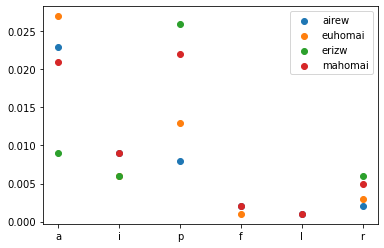

In [74]:
plt.close()
plt.scatter(ainumai.get_tense().keys(), ainumai.get_tense().values(), label= "airew")
plt.scatter(euhomai.get_tense().keys(), euhomai.get_tense().values(),label="euhomai")
plt.scatter(erizw.get_tense().keys(), erizw.get_tense().values(),label="erizw")
plt.scatter(mahomai.get_tense().keys(), mahomai.get_tense().values(),label="mahomai")
plt.legend()

In [318]:
plt.close()

In [ ]:
verbs = mtantum + oppositional
with open("homerische_daten.txt","a",encoding="UTF-8") as daten:
        daten.write('verb|occurrences|noun|verb|adjective|adverb|article|particle|conjunction|preposition|pronoun|numeral|interjection|punctuation|present|imperfect|pluperfect|perfect|futPerfect|future|aorist|indicative|subjunctive|optative|infinitive|imperative|participle|active|passive|middle|mediopassive|nom|gen|dat|acc|voc|loc|class\n')
        for v in verbs:
            v_analyzer = Analyzer(v)
            v_analyzer.analyze()            
                        
            pos = {'n' : 0, 'v':0,'a' : 0,'d' : 0,'l' : 0,'g' : 0,'c' : 0,'r' : 0,'p' : 0,'m' : 0,'m' : 0,'i' : 0,'u':0}
            for x in v_analyzer.get_pos().keys():
                pos[x] = v_analyzer.get_pos()[x]
            
            tense = {'p':0,'i':0,'l':0,'r':0,'t':0,'f':0,'a':0}
            for x in v_analyzer.get_tense().keys():
                tense[x] = v_analyzer.get_tense()[x]
                
            mood = {'i':0,'s':0,'o':0,'n':0,'m':0,'p':0}
            for x in v_analyzer.get_mood().keys():
                mood[x] = v_analyzer.get_mood()[x]
                
            voice = {'a':0, 'p':0, 'm':0, 'e':0}
            for x in v_analyzer.get_voice().keys():
                voice[x] = v_analyzer.get_voice()[x]
            
            case = {'n':0,'g':0,'d':0,'a':0,'v':0,'l':0,}
            for x in v_analyzer.get_case().keys():
                case[x] = v_analyzer.get_case()[x]
            
            # counts
            count = 0
            for f in v_analyzer.v_forms:
                count += len(allIndices(tokens,f))
            daten.write(f"{v}|{count}|")
            
            # pos 
            daten.write(str(pos['n']) + "|" + str(pos['v'])+ "|" +str(pos['a'])+ "|" +str(pos['d'])+ "|" +str(pos['l'])+ "|" +str(pos['g'])+ "|" +str(pos['c'])+ "|" +str(pos['r'])+ "|" +str(pos['p'])+ "|" +str(pos['m'])+ "|" +str(pos['i'])+ "|" +str(pos['u']) + "|")
            
            # tenses and aspects
            daten.write(str(tense['p']) +"|"+str(tense['i']) +"|"+str(tense['l']) +"|"+str(tense['r']) +"|"+str(tense['t']) +"|"+str(tense['f']) +"|"+str(tense['a']) +"|")
            
            # moods
            daten.write(str(mood['i']) +"|"+str(mood['s']) +"|"+str(mood['o']) +"|"+str(mood['n']) +"|"+str(mood['m']) +"|"+str(mood['p']) +"|")
            
            # voice
            daten.write(str(voice['a']) +"|"+str(voice['p']) +"|"+str(voice['m']) +"|"+str(voice['e']) +"|")

            # case
            daten.write(str(case['n'])+"|"+str(case['g'])+"|"+str(case['d'])+"|"+str(case['a'])+"|"+str(case['v'])+"|"+str(case['l']))
            # 
            daten.write("\n")
        

In [157]:
mtantum = ["ἀγάλλομαι","ἄγαμαι","ἀγκάζομαι","ἀγοράομαι","ἅζομαι","αἰδομαι","αἴνυμαι","αἰτιάομαι","ἀκέομαι","ἀκουάζομαι","ἀλάλημαι","ἀλαλύκτημαι","ἀλαλύκτημαι","ἀλέομαι","ἄλθομαι","ἁλίσκομαι","ἅλλομαι","ἀμφαγείρομαι","ἀμφιδινέομαι","ἀμφιμάχομαι","ἀμφινέμομαι","ἀμφιπέλομαι","ἀμφιπένομαι","ἀμφιπεριστέφομαι","ἀμφιπονέομαι","ἀμφιποτάομαι","ἀμφιστρατάομαι","ἀναδέχομαι","ἀναίνομαι","ἀνανέομαι","ἀνασεύομαι","ἀνερείπομαι","ἀνέρομαι","ἀνιάομαι","ἄντομαι","ἀπαίνυμαι","ἀπαμείβομαι","ἀπαναίνομαι","ἀπάχθομαι","ἀπεκλανθάνομαι","ἀπεχθάνομαι","ἀπέχθομαι","ἀποδατέομαι","ἀποθεάομαι","ἀποίχομαι","ἀποκαίνυμαι","ἀποκτάομαι","ἀπολιχμάομαι","ἀπολυμαίνομαι","ἀπομιμνήσκομαι","ἀπομυθέομαι","ἀπονέομαι","ἀπονίναμαι","ἀποσκίδναμαι","ἀράομαι","ἀρνέομαι","ἄσμενος","ἀσπάζομαι","ἀφικνέομαι","ἄχθομαι","βούλομαι","γάνυμαι","γείνομαι","γίγνομαι","γουνάζομαι","γουνόομαι","δατέομαι","δειδίσκομαι","δειδίσσομαι","δείλομαι","δέομαι","δέρκομαι","δεύομαι","δέχομαι","δηλέομαι","δηριάομαι","διαδηλέομαι","διαπέταμαι","διασεύομαι","διασκοπιάομαι","διείρομαι","δίεμαι","διεξερέομαι","διέρχομαι","δίζημαι","διικνέομαι","δοχμόομαι","δύναμαι","δυσωρέομαι","ἐγγίγνομαι","ἐγκατατίθεμαι","ἔγκειμαι","ἕζομαι","εἴδομαι","εἰσάλλομαι","εἰσαφικνέομαι","εἰσέρχομαι","εἰσίζομαι","εἰσμαίομαι","εἰσπέτομαι","ἐκγίγνομαι","ἐκδέχομαι","ἐκκαταπάλλομαι","ἐκποτάομαι","ἐκσεύομαι","ἔλδομαι","ἐμμένω","ἐμπάζομαι","ἐνῆμαι","ἐξαίνυμαι","ἐξακέομαι","ἐξάλλομαι","ἐξαναδύομαι","ἐξαπονέομαι","ἐξέρομαι","ἐξέρχομαι","ἐξηγέομαι","ἐξικνέομαι","ἐξοίχομαι","ἐπαμάομαι","ἐπέλπομαι","ἐπέρχομαι","ἐπεύχομαι","ἐπιγίγνομαι","ἐπίκειμαι","ἐπιλανθάνομαι","ἐπιμαίνομαι","ἐπιμαίομαι","ἐπιμάσσομαι","ἐπιμελέομαι","ἐπιμέμφομαι","ἐπιμένω","ἐπιμήδομαι","ἐπιμιμνήσκομαι","ἐπιπείθομαι","ἐπιπίλναμαι","ἐπιπωλέομαι","ἐπιρρώομαι","ἐπισκύζομαι","ἐπιτέρπομαι","ἐπιτοξάζομαι","ἐποίχομαι","ἕπομαι","ἐποχέομαι","ἔραμαι","ἐργάζομαι","ἐρεύγομαι","ἔρομαι","ἐρυθαίνομαι","ἐρχατάομαι","ἔρχομαι","εὐχετάομαι","εὔχομαι","ἐφάλλομαι","ἐφέζομαι","ἐφεψιάομαι","ἐφήδομαι","ἐφικνέομαι","ἐφίπταμαι","ἑψιάομαι","ἡγέομαι","ἡγέομαι","ἠγερέθομαι","ἥδομαι","ἠερέθομαι","ἧμαι","θάομαι","θεάομαι","ἰάομαι","ἱεράομαι","ἱκνέομαι","ἱλάομαι","ἱλάσκομαι","ἰνδάλλομαι","ἱππάζομαι","ἴπτομαι","καθεψιάομαι","κάθημαι","καθικνέομαι","καίνυμαι","καπνόομαι","καταδέρκομαι","καταθεάομαι","κατάκειμαι","κατακτάομαι","κατάνομαι","κατασεύομαι","κατεναίρομαι","κατέρχομαι","κεῖμαι","κέλομαι","κίδναμαι","κίνυμαι","κραταιόομαι","κτάομαι","λαβρεύομαι","λάζομαι","ληίζομαι","λιάζομαι","λιλαίομαι","λίσσομαι","λιτάζομαι","λωβάομαι","μαίνομαι","μαίομαι","μαντεύομαι","μάρναμαι","μάχομαι","μεγαλίζομαι","μέδομαι","μέθημαι","μείρομαι","μένω","μεταδαίνυμαι","μετανίσσομαι","μετασεύομαι","μετατρέπομαι","μετέρχομαι","μετοίχομαι","μήδομαι","μηρύομαι","μητίομαι","μηχανάομαι","μνάομαι","μυθέομαι","μωμάομαι","ναυτίλλομαι","νεμεσίζομαι","νέομαι","νίσσομαι","νοσφίζομαι","ὀδύρομαι","ὀδύσσομαι","ὄθομαι","οἰνίζομαι","οἴομαι","οἴχομαι","ὀκριάομαι","ὀλοφύρομαι","ὁμηγυρίζομαι","ὄνομαι","ὀπίζομαι","ὁπλίζω","ὅπλομαι","ὄρομαι","ὀρχέομαι","ὄσσομαι","ὀχάομαι","πάομαι","παραγίγνομαι","παραδέχομαι","παραδύομαι","παράκειμαι","παραμένω","παραμυθέομαι","παρανήχομαι","παρατεκταίνομαι","παρέζομαι","παρεξέρχομαι","παρέρχομαι","παρευνάζομαι","παροίχομαι","πατέομαι","πένομαι","πέπνυμαι","περιγίγνομαι","περιδίδομαι","περίκειμαι","περικήδομαι","περιμηχανάομαι","περιπίμπλαμαι","περισείομαι","περιστεναχίζομαι","περιτρέφομαι","περιφράζομαι","περιφύομαι","περιχώομαι","πέτομαι","πεύθομαι","πιμπλάνομαι","πλίσσομαι","πονέομαι","ποτάομαι","ποτινίσσομαι","πρίαμαι","προγίγνομαι","προκαλίζομαι","προκυλίνδομαι","προμάχομαι","προσδέρκομαι","προσερεύγομαι","πρόσκειμαι","προσμυθέομαι","προσπίλναμαι","προτιόσσομαι","πυνθάνομαι","πωλέομαι","πωτάομαι","ῥύομαι","ῥώομαι","σεβάζομαι","σέβομαι","σίνομαι","σιτέομαι","σκύζομαι","στεῦμαι","στιχάομαι","στρεύγομαι","στρατόομαι ","συμμητιάομαι","συμφράζομαι","συναίνυμαι","συνάντομαι","συνδέομαι","σφαραγέομαι","τάνυμαι","τεκμαίρομαι","τεκταίνομαι","τέρσομαι","τεχνάομαι","τίνυμαι","τιτύσκομαι","τοξάζομαι","τορνόομαι","ὑπεξαναδύομαι","ὑπεράλλομαι","ὑπερικταίνομαι","ὑπεροπλίζομαι","ὑπερπέτομαι","ὑπέρχομαι","ὑποδέχομαι","ὑποδύομαι","ὑποθωρήσσομαι","ὑποκλονέομαι","ὑποκλοπέομαι","ὑποκρίνομαι","ὑπολευκαίνομαι","ὑπομένω","ὑπομνάομαι","ὑποσταχύομαι","φέβομαι","φείδομαι","φθέγγομαι","χάζομαι","χαρίζομαι","χερνίπτομαι","χράομαι","χώομαι"]

In [158]:
oppositional = ["ἀάω","ἀάω","ἀάω","ἀάω","ἀάω","ἀάω","ἀάω","ἀάω","ἀάω","ἀάω","ἀάω","ἀάω","ἀάω","ἀάω","ἀάω","ἀάω","ἀάω","ἀάω","ἀάω","ἀάω","ἀάω","ἀάω","ἀάω","ἀάω","ἀγαθός","ἀγαθός","ἀγαθός","ἀγάλλω","ἀγάλλω","ἀγγέλλω","ἄγε","ἄγε","ἄγε","ἄγε","ἄγε","ἀγείρω","ἀγείρω","ἀγείρω","ἀγείρω","ἀγείρω","ἀγείρω","ἀγείρω","ἀγείρω","ἀγείρω","ἀγείρω","ἀγείρω","ἀγείρω","ἀγέλη","ἀγέλη","Ἀγκαῖος","ἀγλαίζω","ἄγνυμι","ἄγνυμι","ἄγνυμι","ἄγνυμι","ἄγνυμι","ἄγνυμι","ἄγνυμι","ἄγνυμι","ἄγνυμι","ἄγνυμι","ἀγορά","ἀγορεύω","ἀγορεύω","ἀγορεύω","ἀγορεύω","ἀγορεύω","ἀγορεύω","ἀγορεύω","ἀγορεύω","ἀγορεύω","ἀγορεύω","ἀγορεύω","ἀγορεύω","ἀγορεύω","ἄγραυλος","ἄγραυλος","ἄγραυλος","ἄγραυλος","ἄγραυλος","ἄγραυλος","ἀγρέω","ἀγρέω","ἀγρέω","ἀγρέω","ἀγρέω","ἀγρέω","ἀγρέω","Ἄγριος","Ἄγριος","Ἄγριος","Ἄγριος","ἄγριος","ἀγχίμολος","ἄγχω","ἄγχω","ἄγχω","ἄγχω","ἄγχω","ἄγχω","ἄγχω","ἄγχω","ἄγχω","ἄγχω","ἄγχω","ἄγχω","ἄγχω","ἄγχω","ἄγχω","ἄγχω","ἄγχω","ἄγχω","ἄγχω","ἄγχω","ἄγω","ἄγω","ἄγω","ἄγω","ἄγω","ἄγω","ἄγω","ἄγω","ἄγω","ἄγω","ἄγω","ἄγω","ἄγω","ἄγω","ἄγω","ἄγω","ἄγω","ἄγω","ἄγω","ἄγω","ἄγω","ἄγω","ἄγω","ἄγω","ἄγω","ἄγω","ἀεικίζω","ἀείρω","ἀείρω","ἀείρω","ἀείρω","ἀείρω","ἀείρω","ἀείρω","ἀείρω","ἀείρω","ἀείρω","ἀείρω","ἀείρω","ἀείρω","ἀείρω","ἀέκων","ἀέκων","ἀέκων","ἀέκων","ἀέκων","ἀέκων","ἀέκων","ἀέξω","ἀέξω","ἀέξω","ἀέξω","ἀέξω","ἀέξω","ἀέξω","ἀέξω","ἄεσα","ἄημι","ἄημι","ἄημι","ἄημι","ἄημι","ἀθάνατος","ἀθάνατος","ἀθάνατος","ἀθάνατος","ἀθάνατος","ἀθάνατος","ἀθάνατος","ἀθάνατος","ἆθλον","ἀθρέω","ἀθρέω","Αἰγύπτιος","Αἰγύπτιος","Αἰνείας","Αἰνείας","Αἰνείας","Αἰνείας","αἴνη","αἴνη","αἴνη","αἶνος","αἰόλος","Αἴολος","αἰονάω","αἰονάω","αἰονάω","αἰονάω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἱρέω","αἴρω","αἴρω","αἴρω","αἴρω","αἴρω","αἴρω","αἴρω","αἴρω","ἀίσθω","ἀίσσω","ἀίσσω","ἀίσσω","ἀίσσω","ἀίσσω","ἀίσσω","ἀίσσω","ἀίσσω","αἰσυμνάω","αἰσχύνω","αἰτέω","ἀίω","ἀίω","ἀίω","ἀκηδέω","ἀκηδέω","ἀκηδέω","ἀκηδέω","ἀκηδέω","ἀκηδέω","ἀκοντίζω","ἀκοντίζω","ἀκοντίζω","ἀκούω","ἀκούω","ἀκούω","ἀκούω","ἀκούω","ἀκούω","ἀκούω","ἀκούω","ἀκούω","ἀκούω","ἀκούω","ἀκούω","ἀκούω","ἀκούω","ἀκούω","ἀκούω","ἀκούω","ἀλαός","ἀλαός","ἀλαπάζω","ἀλεγύνω","ἀλεγύνω","ἀλεγύνω","ἀλείφω","ἀλείφω","ἀλείφω","ἀλέξω","ἀλέξω","ἀλέξω","ἀλέξω","ἀλέω","ἀλέω","ἀλέω","ἀλέω","ἀλέω","ἀλέω","ἀλέω","ἀλέω","ἀλέω","ἀλέω","ἀλέω","ἀλέω","ἄλη","ἄλη","ἀλήθω","ἅλιος","ἅλιος","ἅλιος","ἅλιος","ἅλιος","ἅλιος","ἀλιταίνω","ἀλιταίνω","ἀλιταίνω","ἀλιταίνω","ἀλιταίνω","ἄλλος","ἄλλος","ἄλλος","ἄλλος","ἄλλος","ἄλλος","ἄλλος","ἄλλος","ἄλλος","ἄλλος","ἄλλος","ἄλλος","ἄλλος","ἄλλος","ἄλλος","ἅλμη","ἅλμη","ἀλύσκω","ἀλύσκω","ἀλύσκω","ἀλύσκω","ἀλύσκω","ἀλύσκω","ἀλύσκω","ἀμαλδύνω","ἀμαλδύνω","ἁμαρτάνω","ἁμαρτάνω","ἁμαρτάνω","ἁμαρτάνω","ἁμαρτάνω","ἁμαρτάνω","ἀμείβω","ἀμείβω","ἀμείβω","ἀμείβω","ἀμείβω","ἀμείβω","ἀμείβω","ἀμείβω","ἀμείβω","ἀμείβω","ἀμείβω","ἀμείβω","ἀμείβω","ἀμείβω","ἀμείβω","ἀμείβω","ἀμείβω","ἀμείβω","ἀμείβω","ἀμείβω","ἀμείβω","ἀμείβω","ἀμείβω","ἀμείβω","ἀμέρδω","ἀμέρδω","ἀμύνω","ἀμύνω","ἀμύνω","ἀμύνω","ἀμύνω","ἀμύνω","ἀμύνω","ἀμύνω","ἀμύνω","ἀμύνω","ἀμύνω","ἀμύνω","ἀμύνω","ἀμύνω","ἀμύνω","ἀμύνω","ἀμύνω","ἀμύνω","ἀμύνω","ἀμύνω","ἀμύνω","ἀμύνω","ἀμύνω","ἀμφαφάω","ἀμφαφάω","ἀμφαφάω","ἀμφαφάω","ἀμφιάζω","ἀμφιάζω","ἀμφιάζω","ἀμφιβάλλω","ἀμφιβάλλω","ἀμφικαλύπτω","ἀμφικαλύπτω","Ἀμφίμαχος","ἀμφίπολος","ἀμφιτίθημι","ἀμφιχέω","ἀναβαίνω","ἀναβάλλω","ἀναβάλλω","ἀναβάλλω","ἀνάγω","ἀνάγω","ἀνάγω","ἀνάγω","ἀναδύνω","ἀναδύνω","ἀναδύνω","ἀναδύνω","ἀναείρω","ἀναιρέω","ἀναιρέω","ἀναιρέω","ἀναιρέω","ἀναιρέω","ἀναιρέω","ἀναιρέω","ἀναιρέω","ἀναιρέω","ἀναιρέω","ἀναιρέω","ἀναιρέω","ἀνακλίνω","ἀνακλίνω","ἀνακλίνω","ἀναλέγω","ἀναπάλλω","ἀναπάλλω","ἀναπάλλω","ἀναπίμπλημι","ἀναπλέω","ἀναπλέω","ἀναπνέω","ἀναπνέω","ἀναπνέω","ἀνάπτω","ἀνάπτω","ἀνάπτω","ἀνάπτω","ἀνάσσω","ἀνάσσω","ἀνάσσω","ἀνάσσω","ἀνάσσω","ἀναστενάχω","ἀναστρέφω","ἀνατλῆναι","ἀναφαίνω","ἀναφαίνω","ἀναφαίνω","ἀναφέρω","ἀναχάζω","ἀναχάζω","ἀναχάζω","ἀναχάζω","ἀναχάζω","ἀναχωρέω","ἀναχωρέω","ἀναχωρέω","ἀνδροφάγος","ἀνδροφόνος","ἀνδροφόνος","ἀνδροφόνος","ἀνδροφόνος","ἀνδροφόνος","ἀνδροφόνος","ἀνδροφόνος","ἀνδροφόνος","ἀνεγείρω","ἄνεμος","ἄνεμος","ἄνεμος","ἄνεμος","ἄνεμος","ἄνεμος","ἄνεμος","ἄνεμος","ἄνεμος","ἄνεμος","ἄνεμος","ἄνεμος","ἄνεμος","ἄνεμος","ἄνεμος","ἄνεμος","ἄνεμος","ἄνεμος","ἄνεμος","ἄνεμος","ἄνεμος","ἄνεμος","ἄνεμος","ἀνέχω","ἀνέχω","ἀνέχω","ἀνέχω","ἀνέχω","ἀνέχω","ἀνέχω","ἀνέχω","ἀνέχω","ἀνέχω","ἀνέχω","ἀνέχω","ἀνέχω","ἀνέχω","ἀνέχω","ἀνέχω","ἀνθέω","ἀνθίστημι","ἄνθρωπος","ἄνθρωπος","ἄνθρωπος","ἀνία","ἀνίημι","ἀνίστημι","ἀνίστημι","ἀνίστημι","ἀνίστημι","ἀνίστημι","ἀνίστημι","ἀντάω","ἀντέχω","ἀντιάω","ἀντιάω","ἀντιάω","ἀντιβολέω","ἀντιβολέω","ἀντιβολέω","ἀντιβολέω","ἀντιβολέω","ἀντίθεος","ἀντίθεος","ἀντίθεος","ἀντίθεος","ἀντίθεος","ἀντίθεος","ἀντίθεος","Ἀντίλοχος","Ἀντίλοχος","Ἀντίλοχος","Ἀντίλοχος","Ἀντίλοχος","Ἀντίλοχος","Ἀντίλοχος","Ἀντίμαχος","Ἀντίμαχος","ἀντιφέρω","ἀντιφέρω","ἀντιφέρω","ἀντιφέρω","ἀνύω","ἄνω","ἄνω","ἄνωγα","ἄνωγα","ἄνωγα","ἄνωγα","ἄνωγα","Ἀξιός","Ἀξιός","Ἀξιός","ἄξος","ἄξος","ἄξος","ἄξος","ἀοιδάω","ἀοιδάω","ἀοιδάω","ἀοιδάω","ἀοιδάω","ἀοιδάω","ἀοιδάω","ἀοιδάω","ἀπαγγέλλω","ἀπαγγέλλω","ἀπαγγέλλω","ἀπαμύνω","ἀπαμύνω","ἀπαμύνω","ἀπαμύνω","ἀπαρέσκω","ἀπατάω","ἀπατάω","ἀπάτη","ἀπαυράω","ἀπειλέω","ἀπειλέω","ἀπειλέω","ἀπειλέω","ἄπειμι","ἄπειμι","ἄπειμι","ἄπειμι","ἄπειμι","ἄπειμι","ἄπειμι","ἄπειμι","ἄπειμι","ἀπεῖπον","ἀπειρόω","ἀπειρόω","ἀπειρόω","ἀπειρόω","ἀπειρόω","ἀπειρόω","ἀπειρόω","ἀπέσσουα","ἀπέσσουα","ἀπεχθαίρω","ἀπέχω","ἀπέχω","ἀπέχω","ἀπέχω","ἀπέχω","ἀπέχω","ἀπέχω","ἀπέχω","ἀπέχω","ἀπέχω","ἀπιθέω","ἄπιος","ἄπιος","ἄπιος","ἄπιος","ἀποβαίνω","ἀποβαίνω","ἀποβαίνω","ἀποβαίνω","ἀποβαίνω","ἀποβαίνω","ἀποβαίνω","ἀποδειροτομέω","ἀποδέω","ἀποδιδράσκω","ἀποδιδράσκω","ἀποκείρω","ἀποκρύπτω","ἀποκρύπτω","ἀποκτείνω","ἀποκτείνω","ἀποκτείνω","ἀποκτείνω","ἀποκτείνω","ἀπολάμπω","ἀπολάμπω","ἀπολείβω","ἀπόλλυμι","ἀπόλλυμι","ἀπόλλυμι","ἀπόλλυμι","ἀπόλλυμι","ἀπόλλυμι","ἀπόλλυμι","ἀπόλλυμι","ἀπόλλυμι","ἀπόλλυμι","ἀπόλλυμι","ἀπόλλυμι","ἀπόλλυμι","ἀπόλλυμι","ἀπόλλυμι","ἀπόλλυμι","ἀπόλλυμι","ἀπόλλυμι","ἀπόλλυμι","ἀπόλλυμι","ἀπόλλυμι","ἀπόλλυμι","ἀπόλλυμι","ἀπόλλυμι","ἀπόλλυμι","ἀπόλλυμι","ἀπόλλυμι","ἀπόλλυμι","ἀπόλλυμι","ἀπόλλυμι","ἀπόλλυμι","ἀπόλλυμι","ἀπόλλυμι","ἀπόλλυμι","ἀπολούω","ἀπομόργνυμι","ἀπομόργνυμι","ἀπομόργνυμι","ἀποναίω","ἀποναίω","ἀπονίζω","ἀπονίζω","ἀπονίζω","ἀποξύνω","ἀποπαύω","ἀποπαύω","ἀποπαύω","ἀποπαύω","ἀποπέμπω","ἀποπέμπω","ἀποπέμπω","ἀποπέμπω","ἀποπέμπω","ἀπορραίω","ἀπορρίπτω","ἀποτίθημι","ἀποτίθημι","ἀποτίνω","ἀποτίνω","ἀποτίνω","ἀποτίνω","ἀποτίνω","ἀποτίνω","ἀποτίνω","ἀποτίνω","ἀποτίνω","ἀποτίνω","ἀποτίνω","ἀποτρέπω","ἀποτρέπω","ἀποτρωπάω","ἀποτρωπάω","ἀπόφημι","ἀποφθίνω","ἀποφθίνω","ἀποφθίνω","ἀποφθίνω","ἀποψύχω","ἀποψύχω","ἅπτω","ἅπτω","ἅπτω","ἅπτω","ἅπτω","ἅπτω","ἅπτω","ἅπτω","ἅπτω","ἅπτω","ἅπτω","ἅπτω","ἅπτω","ἅπτω","ἅπτω","ἅπτω","ἅπτω","ἅπτω","ἅπτω","ἅπτω","ἅπτω","ἅπτω","ἅπτω","ἀπωθέω","ἀπωθέω","ἀπωθέω","ἀπωθέω","ἀπωθέω","ἀπωθέω","ἀπωθέω","ἀπωθέω","ἀπωθέω","ἀπωθέω","ἀράζω","ἀράσσω","ἄργυρος","ἄργυρος","ἄργυρος","ἄρειος","ἄρειος","ἄρειος","ἄρειος","ἄρειος","ἀρέσκω","ἀρέσκω","ἀρέσκω","ἀρέσκω","ἀρέσκω","ἀρετάω","ἀρετάω","ἀρετάω","ἀρετάω","ἀρετάω","ἀρετάω","ἀρετάω","ἀρετάω","ἀρετάω","ἀρήγω","ἀριθμέω","ἄριστον","ἄριστον","ἄριστον","ἄριστον","ἄριστος","ἄριστος","ἄριστος","ἄριστος","ἄριστος","ἄρον","ἄρον","ἀρόω","ἀρόω","ἀρτύνω","ἀρτύνω","ἀρτύνω","ἀρτύνω","ἄρχω","ἄρχω","ἄρχω","ἄρχω","ἄρχω","ἄρχω","ἄρχω","ἄρχω","ἄρχω","ἄρχω","ἄρχω","ἄρχω","ἄρχω","ἄση","ἄση","ἄση","ἄση","ἄση","ἄση","ἄση","ἄση","ἀσκέω","ἀσκέω","ἀτέμβω","ἄτη","ἀτιμάω","αὐγάζω","αὐγάζω","αὐγάζω","αὐδάω","αὐδάω","αὐλέω","αὐλέω","αὐλέω","αὐλέω","αὐλέω","αὐλέω","αὐλέω","αὐλέω","αὐλέω","αὐλέω","αὐλέω","αὐλέω","αὐλέω","αὐλέω","αὐλέω","ἀυτέω","ἀυτέω","ἀυτέω","ἀυτέω","ἀυτέω","ἀυτέω","αὐχμέω","αὔω2","ἀφαιρέω","ἀφαιρέω","ἀφαιρέω","ἀφαιρέω","ἀφαιρέω","ἀφαιρέω","ἀφαιρέω","ἀφαιρέω","ἀφαιρέω","ἀφαιρέω","ἀφαιρέω","ἀφαιρέω","ἀφαιρέω","ἀφαιρέω","ἀφαιρέω","ἀφαιρέω","ἀφαιρέω","ἀφαιρέω","ἀφαμαρτάνω","ἀφαμαρτάνω","ἀφαμαρτάνω","ἀφαμαρτάνω","ἀφαρπάζω","ἀφαυρός","ἀφεστήξω","ἀφεστήξω","ἀφεστήξω","ἀφίημι","ἀφίημι","ἀφοπλίζω","ἀφραδέω","ἀφύσσω","ἀφύσσω","ἀφύσσω","ἀχεύω","ἀχεύω","ἀχεύω","ἀχεύω","ἀχεύω","ἀχεύω","ἀχεύω","ἀχεύω","Ἀψευδής","ἄω3","ἄω3","ἀωτέω","ἄωτον","βάζω","βάζω","βάζω","βαίνω","βαίνω","βαίνω","βαίνω","βαίνω","βαίνω","βαίνω","βαίνω","βαίνω","βάλλω","βάλλω","βάλλω","βάλλω","βάλλω","βάλλω","βάλλω","βάλλω","βάλλω","βάλλω","βάλλω","βάλλω","βάλλω","βάλλω","βάλλω","βάλλω","βάλλω","βάλλω","βάλλω","βάλλω","βάλλω","βάλλω","βάλλω","βάλλω","βάλλω","βάλλω","βάλλω","βάλλω","βάλλω","βάλλω","βάλλω","βάλλω","βάλλω","βάλλω","βάλλω","βάλλω","βάλλω","βάλλω","βάλλω","βάλλω","βάλλω","βάλλω","βαρέω","βαρέω","βαρέω","βαρύνω","βασίλεια","βασίλεια","βασίλεια","βασίλεια","βασίλεια","βασίλεια","βασίλεια","βασίλεια","βασίλεια","βασίλεια","βασίλεια","βασιλεύω","βία","βία","βία","βία","βία","βία","βία","βία","βιάζω","βιάζω","βιάζω","βιάζω","βιάζω","βιάζω","Βίας","Βίας","Βίας","Βίας","Βίας","Βίας","Βίας","Βίας","Βίας","Βίας","βιάω","βιάω","βιάω","βιάω","βιάω","βιάω","βιάω","βιάω","βιβάσθω","βιβάσθω","βιβάσθω","βίβημι","βίβημι","βίβημι","βιβρώσκω","βίος","βιόω","βλάπτω","βλάπτω","βλάπτω","βόα","βόα","βόα","βόα","βόα","βόα","βόα","βόα","βόα","βόα","βόα","βόα","βόα","βόα","βόα","βόθρος","βόθρος","βουκολέω","βουκολέω","βουλεύω","βουλεύω","βρέμω","βρέμω","βρέμω","βρόντης","βρότος","βρώμη","γαμέω","γαμέω","γαμέω","γαμέω","γαμέω","γαμέω","γάμος","γάμος","γάμος","γάμος","γάμος","γάμος","γάμος","γάμος","γάμος","γελάω","γελάω","γέλως","γέλως","γένειον","γένειον","γένειον","γενητός","γενητός","γενητός","γενητός","γενητός","γενητός","γενητός","γενητός","γενητός","γενητός","γενητός","γενητός","γενητός","γενητός","γενητός","γενητός","γενητός","γενητός","γενητός","γενητός","γενητός","γενητός","γέντο","γέντο","γέντο","γεύω","γεύω","γεύω","γεύω","γηθέω","γηθέω","γῆρας","γῆρας","γῆρας","γῆρας","γῆρας","γῆρας","γῆρας","γῆρας","γῆρας","γῆρας","γῆρας","γῆρας","γῆρας","γῆρας","γῆρας","γῆρας","γῆρας","γῆρας","γιγνώσκω","γιγνώσκω","γιγνώσκω","γιγνώσκω","γιγνώσκω","γιγνώσκω","γιγνώσκω","γιγνώσκω","Γλαῦκος","γοάω","γοάω","γοάω","γόνος","γόος","γόος","γόος","γόος","γόος","γόος","γόος","γόος","γόος","γόος","γόος","γόος","γόος","γόος","γόος","γόος","γόος","γόος","γόος","γυιόω","γυμνός","γυμνόω","δαιδάλεος","δαίζω","δαίζω","δαίζω","δαίζω","δαίμων","δαίνυμι","δαίνυμι","δαίνυμι","δαίνυμι","δαίνυμι","δαίνυμι","δαίνυμι","δαίνυμι","δαίνυμι","δαίνυμι","δαίνυμι","δαίνυμι","δαίνυμι","δαίνυμι","δαίνυμι","δαίνυμι","δάιος","δάιος","δάιος","δάιος","δάιος","δάιος","δάιος","δάιος","δάιος","δάιος","δάιος","δαιτρεύω","δαίω","δαίω","δαίω","δαίω","δαίω2","δακρύω","δακρύω","δακρύω","δαμάζω","δαμάζω","δαμάζω","δαμάζω","δαμάζω","δαμάζω","δαμάζω","δαμάζω","δαμάζω","δαμάζω","δαμάζω","δαμάζω","δαμάζω","δαμάζω","δαμάζω","δαμάζω","δαμάω","δαμάω","δαμάω","δαμάω","δαμάω","δαμάω","δαμάω","δαμάω","δαμάω","δαμάω","δαμάω","δαμάω","δαμάω","δαμάω","δαμάω","δαμάω","δαμάω","δαμάω","δαμάω","δαμάω","δάμνημι","δάμνημι","δάμνημι","δάμνημι","δάμνημι","δάμνημι","δάμνημι","δάμνημι","δάω","δάω","δάω","δάω","δάω","δείδω","δείδω","δεικανάω","δείκνυμι","δείκνυμι","δείκνυμι","δείκνυμι","δείκνυμι","δείκνυμι","δείκνυμι","δείκνυμι","δεῖνος","δεῖνος","δεῖνος","δειπνέω","δεῖπνον","δεῖπνον","δεῖπνον","δειροτομέω","δεκάς","δέκατος","δέμω","δεξιά","δέπας","δεσμεύω","δεσμεύω","δεύω2","δεύω2","δεύω2","δεύω2","δέω","δέω","δέω","δέω","δέω","δέω","δέω","δέω","δέω2","δέω2","δέω2","δέω2","δέω2","δέω2","δέω2","δέω2","δέω2","δέω2","δέω2","δέω2","δέω2","δέω2","δέω2","δέω2","δέω2","δηιόω","δῆμος","δῆμος","δῆμος","δῆμος","δῆμος","δῆμος","δῆμος","δῆμος","δῆμος","δῆμος","δῆμος","δήω","δήω","δήω","διαείδω2","διαίνω","διακείρω","διακοσμέω","διακρίνω","διακρίνω","διαλέγω","διαλέγω","διαλέγω","διαλέγω","διαμοιράω","διαπέρθω","διαπέρθω","διαπλήσσω","διαρραίω","διαρραίω","διαρραίω","διαρραίω","διαφαίνω","διαφαίνω","διαφαίνω","διδάσκω","δίδημι","δίδημι","δίδημι","δίδημι","δίδημι","δίδημι","δίδημι","δίδημι","δίδημι","δίδημι","δίδημι","δίδημι","δίδημι","δίδημι","δίδημι","δίδημι","δίδημι","δίδημι","δίδημι","δίδωμι","δίδωμι","δίδωμι","δίδωμι","δίδωμι","δίδωμι","δίδωμι","δίδωμι","δίδωμι","δίδωμι","δίδωμι","δίδωμι","δίδωμι","δίδωμι","δίδωμι","δίδωμι","δίδωμι","δίδωμι","δίδωμι","δίδωμι","δίδωμι","δίδωμι","δίδωμι","δίδωμι","δίδωμι","δίδωμι","δίδωμι","δίδωμι","δίδωμι","δίδωμι","δίδωμι","δίδωμι","δίδωμι","δίδωμι","δίδωμι","δίδωμι","δίδωμι","δίδωμι","δίδωμι","δίδωμι","δίδωμι","δίδωμι","δίδωμι","δίδωμι","δίδωμι","δίδωμι","δίδωμι","δίδωμι","δίδωμι","δίδωμι","δίδωμι","δίδωμι","δίδωμι","δίδωμι","δίδωμι","δίδωμι","δίδωμι","δίδωμι","δίδωμι","δίειμι","διίστημι","δικάζω","δικάζω","δικάζω","δίκαιος","δινεύω","δίνη","διοιστεύω","διοιστεύω","Δίον","Δίον","Δίον","δίσκος","διώκω","διώκω","Διώρης","δοάσσατο","δοάσσατο","δοάσσατο","δοάσσατο","δοάσσατο","δοάσσατο","δοάσσατο","δοάσσατο","δοάσσατο","δοάσσατο","δοάσσατο","Δόλιος","Δόλιος","Δόλιος","Δόλιος","δόλος","δόλος","δόλος","δόλος","δόμος","δόμος","δόμος","δόμος","δόμος","δόμος","δόμος","δόμος","δόμος","δόμος","δόμος","δόμος","δόμος","δόμος","δόμος","δόμος","δόμος","δόμος","δόμος","δόμος","δόμος","δόμος","δόμος","δόμος","δορπέω","δορπέω","δόρπον","δόρπον","δόρπον","δόρπον","δόρπον","δόρπον","δόρπον","δόρπον","δόρπον","δουπέω","δρόμος","δρόμος","δρόμος","δύη","δύο","δύο","δύο","δύο","δύο","δύο","δύο","δύο","δύο","δύο","δύο","δύο","δύο","δύο","δύο","δύο","δύο","δύο","δύο","δύο","δύο","δύο","δύο","δύο","δύο","δύο","δύο","δύο","δύο","δύο","δύο","δύο","δύο","δύο","δύο","δύο","δύο","δύο","δύο","δύτης","δύω","δύω","δύω","δύω2","δύω2","δύω2","δύω2","δύω2","δύω2","δύω2","δύω2","δύω2","δύω2","δύω2","δύω2","δύω2","δύω2","δύω2","δύω2","δύω2","δύω2","δύω2","δύω2","δύω2","δύω2","δύω2","δύω2","δύω2","δύω2","δύω2","δύω2","δύω2","δύω2","δύω2","δύω2","δύω2","δύω2","δῶμα","δῶμα","δῶμα","δῶμα","Δωτώ","ἐάω","ἐάω","ἐάω","ἐάω","ἐάω","ἐάω","ἐάω","ἐάω","ἐάω","ἐάω","ἐάω","ἐάω","ἐάω","ἐάω","ἐάω","ἐάω","ἐάω","ἐάω","ἐάω","ἐάω","ἐάω","ἐάω","ἐάω","ἐάω","ἐάω","ἐάω","ἐάω","ἐάω","ἐάω","ἐάω","ἐάω","ἐάω","ἐάω","ἐάω","ἐάω","ἐάω","ἐάω","ἐάω","ἐγγείνωνται","ἐγγυαλίζω","ἐγγυαλίζω","ἐγγυαλίζω","ἐγγυαλίζω","ἐγγυάω","ἐγγύη","ἐγείρω","ἐγείρω","ἐγείρω","ἐγείρω","ἐγείρω","ἐγείρω","ἐγείρω","ἐγκλίνω","ἐγκοσμέω","ἔγρω","ἔγρω","ἔγρω","ἔγρω","ἔγρω","ἔγρω","ἔγρω","ἔγρω","ἐγχείη","ἐγχείη","ἐγχείη","ἐγχείη","ἐγχείη","ἐγχρίμπτω","ἐγχρίμπτω","ἐγχύνω","ἐγώ","ἐγώ","ἐγώ","ἐγώ","ἐγώ","ἐγώ","ἐγώ","ἐγώ","ἐγώ","ἐγώ","ἐγώ","ἐγώ","ἐγώ","ἐγώ","ἐγώ","ἐγώ","ἐγώ","ἐγώ","ἐγώ","ἐγώ","ἐγώ","ἐγώ","ἐγώ","ἐγώ","ἐγώ","ἐγώ","ἐγώ","ἐγώ","ἐγώ","ἐγώ","ἐγώ","ἐγώ","ἑδνόω","ἕδρα","ἕδρα","ἑδριάω","ἑδριάω","ἑδριάω","ἑδριάω","ἑδριάω","ἔδω","ἔδω","ἔδω","ἔδω","ἔδω","ἔδω","ἔδω","ἔδω","ἔδω","ἔθειρα","ἔθειρα","ἔθειρα","ἐθέλω","ἐθέλω","ἔθω","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἶδον","εἴκω","εἴκω","εἰλαπίνη","εἰλύω","εἰλύω","εἰλύω","εἰλύω","εἴλω","εἴλω","εἴλω","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἰμί","εἶμι","εἶμι","εἶμι","εἶμι","εἶμι","εἶμι","εἶμι","εἶμι","εἶμι","εἶμι","εἶμι","εἶμι","εἶμι","εἶμι","εἶμι","εἶμι","εἶμι","εἶμι","εἶμι","εἶμι","εἶμι","εἶμι","εἶμι","εἶμι","εἶμι","εἶμι","εἶμι","εἶμι","εἶμι","εἶμι","εἶμι","εἶμι","εἶμι","εἶμι","εἶμι","εἶμι","εἶμι","εἶμι","εἶμι","εἶπον","εἶπον","εἶπον","εἶπον","εἶπον","εἶπον","εἶπον","εἶπον","εἶπον","εἶπον","εἶπον","εἶπον","εἶπον","εἶπον","εἶπον","εἶπον","εἶπον","εἶπον","εἶπον","εἶπον","εἶπον","εἶπον","εἶπον","εἶπον","εἶπον","εἶπον","εἶπον","εἶπον","εἶπον","εἶπον","εἶπον","εἰρήνη","εἰρήνη","εἰρήνη","εἴρω","εἰσαγείρω","εἰσαγείρω","εἰσαγείρω","εἰσδύνω","εἰσίημι","ἐίσκω","ἐίσκω","ἐίσκω","ἐίσκω","εἰσοράω","εἰσοράω","εἰσοράω","εἰσοράω","εἰσοράω","εἰσοράω","εἰσοράω","εἰσοράω","εἰσοράω","εἰσφέρω","εἰσχέω","εἰσχέω","ἐκδέω","ἔκδοτος","ἐκδύω","ἐκεῖνος","ἐκεῖνος","ἐκεῖνος","ἐκεῖνος","ἐκεῖνος","ἐκεῖνος","ἐκεῖνος","ἐκεῖνος","ἐκεῖνος","ἐκεῖνος","ἐκεῖνος","ἐκεῖνος","ἐκεῖνος","ἐκεῖνος","ἐκεῖνος","ἐκεῖνος","ἐκεῖνος","ἐκεῖνος","ἐκεῖνος","ἐκεῖνος","ἐκεῖνος","ἐκεῖνος","ἑκηβόλος","ἐκκαλέω","ἐκλανθάνω","ἐκλανθάνω","ἐκλανθάνω","ἐκλανθάνω","ἐκλύω","ἐκλύω","ἐκλύω","ἐκλύω","ἐκλύω","ἐκλύω","ἐκλύω","ἐκλύω","ἐκπέμπω","ἐκπέρθω","ἐκπέρθω","ἐκπέρθω","ἐκπίνω","ἐκτελέω","ἐκτελέω","ἐκτελέω","ἐκτελέω","ἐκτελέω","ἐκτελέω","ἐκτελέω","ἐκτελέω","ἐκτελέω","ἔκφημι","ἔκφημι","ἐκφθίνω","ἐκφθίνω","ἐκφορέω","ἐκχέω","ἐκχέω","ἐλαία","ἐλαία","ἐλαία","ἐλαία","ἐλαία","ἐλαία","ἐλασᾶς","ἐλασᾶς","ἐλασᾶς","ἐλασείω","ἐλασείω","ἐλασείω","ἐλασείω","ἐλαύνω","ἐλαύνω","ἐλαύνω","ἐλαύνω","ἐλαύνω","ἐλαύνω","ἐλαύνω","ἐλαύνω","ἐλαύνω","ἐλαύνω","ἐλαύνω","ἐλαύνω","ἐλαύνω","ἐλαύνω","ἐλαύνω","ἐλαύνω","ἐλαφρός","ἐλελίζω","ἐλελίζω","ἑλίσσω","ἑλίσσω","ἑλίσσω","ἑλίσσω","ἕλκω","ἕλκω","ἕλκω","ἕλκω","ἕλκω","ἕλκω","ἕλκω","ἕλκω","ἕλκω","ἕλκω","ἕλκω","ἔλπω","ἔλπω","ἔλπω","ἔλπω","ἔλπω","ἔλπω","ἔλπω","ἔλπω","ἔλπω","ἔλπω","ἔλπω","ἔλπω","ἔλπω","ἔλπω","ἔλπω","ἔλπω","ἔλπω","ἔλπω","ἔλπω","ἔλπω","ἔλπω","ἔλπω","ἔλπω","ἔλπω","ἔλπω","ἔλπω","ἔλπω","ἐλύω","ἐλύω","ἐμβάλλω","ἐμέω","ἐμέω","ἐμέω","ἐμέω","ἐμέω","ἐμέω","ἐμέω","ἐμέω","ἐμέω","ἐμέω","ἐμέω","ἐμέω","ἐμέω","ἐμέω","ἐμέω","ἐμέω","ἐμέω","ἐμέω","ἐμπελάζω","ἐμπίμπρημι","ἐμπίμπρημι","ἐμπίμπρημι","ἐμπίμπρημι","ἐμπίπλημι","ἐμπίπλημι","ἐμπίπλημι","ἐμπνέω","ἐμπνέω","ἐμπολάω","ἐμφορέω","ἐμφορέω","ἐναίρω","ἐναίρω","ἐναίρω","ἐναίρω","ἔναυλος","ἔναυλος","ἐνδείκνυμι","ἔνειμι","ἐνέπω","ἐνέπω","ἐνέπω","ἐνέπω","ἐνέπω","ἐνέπω","ἐνέπω","ἐνέπω","ἐνέπω","ἐνέπω","ἐνέπω","ἐνίημι","ἐνίημι","ἐνίημι","ἐνίημι","ἐνίπτω","ἕννυμι","ἕννυμι","ἕννυμι","ἕννυμι","ἕννυμι","ἕννυμι","ἕννυμι","ἕννυμι","ἕννυμι","ἕννυμι","ἕννυμι","ἕννυμι","ἕννυμι","ἕννυμι","ἕννυμι","ἕννυμι","ἕννυμι","ἕννυμι","ἕννυμι","ἕννυμι","ἕννυμι","ἕννυμι","ἕννυμι","ἕννυμι","ἕννυμι","ἐνόρνυμι","ἐνόρνυμι","ἐνστάζω","ἐνστηρίζω","ἐνστρέφω","ἐντανύω","ἐντανύω","ἐντανύω","ἐντανύω","ἐντανύω","ἐντανύω","ἐντείνω","ἐντείνω","ἐντίθημι","ἐντίθημι","ἐντίθημι","ἐντίθημι","ἐντρέπω","ἐντρέπω","ἐντύνω","ἐντύνω","ἐντύνω","ἐντύνω","ἐντύνω","ἐξαιρέω","ἐξαιρέω","ἐξαιρέω","ἐξαιρέω","ἐξαιρέω","ἐξαιρέω","ἐξαιρέω","ἐξαιρέω","ἐξαιρέω","ἐξαιρέω","ἐξαιρέω","ἐξαιρέω","ἐξαιρέω","ἐξαιρέω","ἐξαιρέω","ἐξαιρέω","ἐξαίρω","ἐξαλαόω","ἐξαλαπάζω","ἐξαλαπάζω","ἐξαλαπάζω","ἐξαλαπάζω","ἐξαναλύω","ἐξαναλύω","ἐξαπατάω","ἐξαπαφίσκω","ἐξάπτω","ἐξάρχω","ἐξαφαιρέω","ἔξειμι2","ἐξεῖπον","ἐξεναρίζω","ἐξερεείνω","ἐξερύω","ἔξεστι","ἐξονομαίνω","ἐξοπίσω","ἐξοπίσω","ἐξοπίσω","ἐξοπίσω","ἐξοπίσω","ἐξοπίσω","ἐξοπίσω","ἐξοπίσω","ἔοικα","ἔοικα","ἑός","ἑός","ἑός","ἑός","ἑός","ἑός","ἑός","ἐπαγλαίζω","ἐπαινέω","ἐπαινέω","ἐπαινέω","ἐπαινέω","ἐπαίσσω","ἐπαίσσω","ἐπαίσσω","ἐπαίσσω","ἐπαίσσω","ἐπαίσσω","ἐπαίσσω","ἐπακούω","ἐπακούω","ἐπακούω","ἐπακούω","ἐπακούω","ἐπακούω","ἐπαμείβω","ἐπαμύνω","ἐπαμύνω","ἐπαμύνω","ἐπαμύνω","ἐπανατίθημι","ἐπαρτάω","ἐπάρχω","ἐπάρχω","ἐπασκέω","ἐπαυρέω","ἐπαυρέω","ἐπαυρέω","ἐπαύω","ἐπαύω","ἐπαύω","ἐπαύω","ἐπαύω","ἐπεγείρω","ἐπεγείρω","ἐπείγω","ἐπείγω","ἐπείγω","ἐπείγω","ἐπείγω","ἐπείγω","ἐπεῖδον","ἔπειμι","ἔπειμι2","ἔπειμι2","ἔπειμι2","ἐπελαύνω","ἐπελαύνω","ἐπεντύνω","ἐπιβαίνω","ἐπιβαίνω","ἐπιβαίνω","ἐπιβαίνω","ἐπιβαίνω","ἐπιβαίνω","ἐπιβαίνω","ἐπιβάσκω","ἐπιβοάω","ἐπιβοάω","ἐπιγράφω","ἐπιδέω2","ἐπιδέω2","ἐπιδέω2","ἐπιδέω2","ἐπιδέω2","ἐπιδινέω","ἐπιέννυμι","ἐπιθέω","ἐπιθέω","ἐπιθέω","ἐπικέλλω","ἐπικεύθω","ἐπικεύθω","ἐπικεύθω","ἐπικεύθω","ἐπικεύθω","ἐπικεύθω","ἐπικεύθω","ἐπικεύθω","ἐπικίδνημι","ἐπικίδνημι","ἐπικλώθω","ἐπικλώθω","ἐπικλώθω","ἐπικλώθω","ἐπικουρέω","ἐπικουρέω","ἐπικουρέω","ἐπικουρέω","ἐπικουρέω","ἐπικουρέω","ἐπικουρέω","ἐπικουρέω","ἐπικουρέω","ἐπικουρέω","ἐπιμίγνυμι","ἐπιμίγνυμι","ἐπιορκέω","ἐπιρρώννυμι","ἐπισεύω","ἐπισεύω","ἐπισεύω","ἐπισεύω","ἐπισεύω","ἐπισεύω","ἐπισεύω","ἐπισεύω","ἐπισεύω","ἐπισεύω","ἐπισεύω","ἐπιστενάχω","ἐπιστέφω","ἐπιστέφω","ἐπιστέφω","ἐπιστέφω","ἐπιστέφω","ἐπίσχω","ἐπιτέλλω","ἐπιτέλλω","ἐπιτέλλω","ἐπιτέλλω","ἐπιτέλλω","ἐπιτέλλω","ἐπιτέλλω","ἐπιτέλλω","ἐπιτέλλω","ἐπιτέλλω","ἐπιτέλλω","ἐπιτέλλω","ἐπιτέλλω","ἐπιτέλλω","ἐπιτέλλω","ἐπιτέλλω","ἐπιτίθημι","ἐπιτλῆναι","ἐπιτλῆναι","ἐπιτολμάω","ἐπιτρέπω","ἐπιτρέπω","ἐπιτρέπω","ἐπιτρέπω","ἐπιτρέπω","ἐπιτρέπω","ἐπιφράζω","ἐπιφράζω","ἐπιφράζω","ἐπιχειρέω","ἐπιχέω","ἐπιχέω","ἐπιχέω","ἐπιχέω","ἐπιχέω","ἐπιχρίω","ἐποράω","ἐποράω","ἐποράω","ἐποράω","ἐποτρύνω","ἐποτρύνω","ἐποτρύνω","ἐποτρύνω","ἐπώχατο","ἔργνυμι","ἔργνυμι","ἔργνυμι","ἔργνυμι","ἔργνυμι","ἔργνυμι","ἔργνυμι","ἔρδω","ἔρδω","ἔρδω","ἔρδω","ἔρδω","ἔρδω","ἐρεείνω","ἐρείδω","ἐρείδω","ἐρείδω","ἐρείδω","ἐρείδω","ἐρείδω","ἐρείδω","ἐρείπω","Ἐρετμεύς","ἐρέω","ἐρέω","ἐρητύω","ἐρητύω","ἐρητύω","ἐρητύω","ἐρητύω","ἐριδαίνω","ἐριδαίνω","ἐριδαίνω","ἐριδαίνω","ἐρίζω","ἐρίζω","Ἐρινύς","Ἐρινύς","Ἐρινύς","Ἐρινύς","ἔριον","ἔρρω","ἔρρω","ἔρρω","ἔρρω","ἔρσα","ἐρύκω","ἐρύκω","ἐρύκω","ἐρύκω","ἐρύκω","ἐρύκω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρύω","ἐρῶ","ἐρῶ","ἐρῶ","ἐρῶ","ἐρῶ","ἐρωέω","ἐρωέω","ἐρωέω","ἐσθίω","ἐσθίω","ἐσθίω","ἔσθω","ἔσθω","ἔσθω","ἔσθω","ἔσθω","ἔσθω","ἔσθω","ἔσθω","ἔστε","ἔστε","ἔστε","ἔστε","ἔστε","ἔστε","ἔστε","ἔστε","ἔστε","ἔστε","ἔστε","ἔστε","ἔστε","ἔστε","ἔστε","ἔστε","ἔστε","ἔστε","ἔστε","ἑταιρίζω","ἑταιρίζω","ἑταῖρος","ἑταῖρος","ἑταῖρος","ἑταῖρος","ἑταῖρος","ἑταῖρος","ἑταῖρος","ἑταῖρος","ἑταῖρος","ἑταῖρος","ἑταῖρος","ἔτης","ἔτης","ἔτης","ἔτης","ἑτοιμάζω","ἑτοιμάζω","εὕδω","εὐεργέω","εὐεργέω","εὐνάζω","εὐνάζω","εὐνάζω","εὐνάζω","εὐνάζω","εὐνάω","εὐνάω","εὐνάω","εὐνάω","εὐνάω","εὐνάω","εὐνάω","εὐνάω","εὐνάω","εὐνάω","εὐνάω","εὐνάω","εὐνάω","εὐνάω","εὐνάω","εὐνάω","εὐνάω","εὐνάω","εὐνάω","εὐνάω","εὐνάω","Εὐπείθης","εὑρίσκω","εὑρίσκω","εὑρίσκω","Εὐρυνόμη","εὐφημέω","εὐφραίνω","εὐφραίνω","εὐώδης","ἐφάπτω","ἐφάπτω","ἐφάπτω","ἐφάπτω","ἐφάπτω","ἐφάπτω","ἐφάπτω","ἐφάπτω","ἐφέλκω","ἐφέλκω","ἐφέλκω","ἐφέπω","ἐφευρίσκω","ἐφίζω","ἐφίζω","ἐφίζω","ἐφίημι","ἐφίημι","ἐφίημι","ἐφίστημι","ἐφίστημι","ἐφίστημι","ἐφίστημι","ἐφίστημι","ἐφίστημι","ἐφίστημι","ἐφίστημι","ἐφίστημι","ἐφίστημι","ἐφίστημι","ἐφίστημι","ἐφίστημι","ἐφίστημι","ἐφίστημι","ἐφίστημι","ἐφίστημι","ἐφίστημι","ἐφίστημι","ἐφίστημι","ἐφίστημι","ἐφίστημι","ἐφίστημι","ἐφίστημι","ἐφίστημι","ἐφίστημι","ἐφίστημι","ἐφίστημι","ἐφίστημι","ἐφίστημι","ἐφίστημι","ἐφίστημι","ἐφίστημι","ἐφίστημι","ἐφίστημι","ἐφίστημι","ἐφίστημι","ἐφίστημι","ἐφίστημι","ἐφίστημι","ἐφομαρτέω","ἐφοπλίζω","ἐφοπλίζω","ἐφορμάω","ἐφορμάω","ἐφορμάω","ἐφορμάω","ἐφορμάω","Ἐφύρα","Ἐφύρα","Ἐφύρα","Ἔχετος","ἐχθοδοπέω","ἔχις","ἔχις","ἔχις","ἔχις","ἔχις","ἔχις","ἔχις","ἔχις","ἔχις","ἔχω","ἔχω","ἔχω","ἔχω","ἔχω","ἔχω","ἔχω","ἔχω","ἔχω","ἔχω","ἔχω","ἔχω","ἔχω","ἔχω","ἔχω","ἔχω","ἔχω","ἔχω","ἔχω","ἔχω","ἔχω","ἔχω","ἔχω","ἔχω","ἔχω","ἔχω","ἔχω","ἔχω","ἔχω","ἔχω","ἔχω","ἔχω","ἔχω","ἔχω","ἔχω","ἔχω","ἔχω","ἔχω","ἔχω","ἔχω","ἔχω","ἔχω","ἔχω","ἔχω","ἔχω","ἔχω","ἔχω","ἔχω","ἔχω","ἔχω","ἔχω","ἔχω","ἔχω","ἔχω","ἔχω","ἔχω","ἔχω","ἔχω","ἔχω","ἔχω","ἔχω","ἕψω","ζάω","ζάω","ζεύγνυμι","ζεύγνυμι","ζεύγνυμι","ζεύγνυμι","ζέω","ζόφος","ζυγέω","ζυγέω","ζυγέω","ζώννυμι","ζώννυμι","ζώννυμι","ζώννυμι","ζώννυμι","ζωός","ζωός","ζωός","ζωός","ζωός","ζώω","ζώω","ζώω","Ἥβη","Ἥβη","Ἥβη","Ἥβη","Ἥβη","Ἥβη","Ἥβη","Ἥβη","Ἥβη","Ἥβη","ἡγεμονεύω","ἡγεμονεύω","ἥκω","ἤλεκτρον","ἡμιτελέω","ἡνίοχος","ἡνίοχος","ἡνίοχος","ἤπειρος","ἤπειρος","ἤπειρος","ἤπειρος","ἤπειρος","ἤπειρος","ἤπειρος","ἤπιος","ἤπιος","θάνατος","θάνατος","θάνατος","θάνατος","θάνατος","θάνατος","θάνατος","θάνατος","θάνατος","θάνατος","θάνατος","θάνατος","θάνατος","θάνατος","θάνατος","θάνατος","θάνατος","θάνατος","θάνατος","θάνατος","θάνατος","θάνατος","θάνατος","θάνατος","θάνατος","θάνατος","θάνατος","θάνατος","θάνατος","θάνατος","θάνατος","θάνατος","θάπτω","θάπτω","θάπτω","θάρσυνος","θαυμάζω","θαυμάζω","θαυμάζω","θαυμάζω","θάω","θέα","θέα","θέα","θέα","θέα","θέα","θέα","θέα","θέα","θέα","θέα","θέα","θέα","θέειον","θέειον","θέειον","θέειον","θεειόω","θεειόω","θείνω","θείνω","θείνω","θείνω","θείνω","θείνω","θείνω","θείνω","θείνω","θεῖος","θεῖος","θεῖος","θεῖος","θεῖος","θεῖος","θέλγω","θέλγω","θερμαίνω","θέρμω","θέρμω","θέρμω","θέρω","θέρω","θέρω","θέω","θέω","θέω","θέω","θέω","θέω","θέω","θέω","θέω","θέω","θέω","θέω","θέω","θέω","θέω","θέω","θέω","θέω","θέω","θήγω","θῆλυς","θῆλυς","θῆλυς","θῆλυς","θῆλυς","θήρ","θήρ","Θήρα","Θήρα","θλίβω","θνήσκω","θνήσκω","θνήσκω","θνήσκω","Θόη","Θόη","θόλος","θόλος","θοός","θοός","θοός","θοός","θοός","θοός","θοός","θοός","θοός","θοός","θοός","θοός","θοός","θοός","θοός","θρῴσκω","θυμοβόρος","θυμοβόρος","θυμοβόρος","θυμοβόρος","θύμον","θύμον","θύμον","θύμον","θύμον","θύμον","θύμον","θύμον","θύμον","θύμον","θύμον","θύμον","θύον","θύρα","θύρα","θύρα","θύρα","θύω","θωρήσσω","θωρήσσω","θωρήσσω","θωρήσσω","θωρήσσω","θωρήσσω","θωρήσσω","θωρήσσω","θωρήσσω","θωρήσσω","θωρήσσω","θωρήσσω","θωρήσσω","θωρήσσω","θωρήσσω","θωρήσσω","θωρήσσω","θωρήσσω","θωρήσσω","ἰαίνω","ἰαίνω","ἰαίνω","ἰαίνω","ἰαίνω","ἰάλλω","ἰάλλω","ἰαύω","ἰάχω","Ἴδη","Ἴδη","Ἴδη","Ἴδη","Ἴδη","Ἴδη","Ἴδη","Ἴδη","Ἴδη","ἱδρόω","ἱδρόω","ἱδρόω","ἱδρόω","ἱδρόω","ἱδρόω","ἱδρόω","ἱδρόω","ἱδρόω","ἱδρόω","ἱδρόω","ἱδρόω","ἱδρόω","ἱδρόω","ἱδρόω","ἱδρόω","ἱερεύς","ἱερεύς","ἱερεύς","ἱερεύς","ἱερεύω","ἱερεύω","ἱερεύω","ἱερεύω","ἱερεύω","ἱερός","ἱερός","ἵζω","ἵζω","ἵζω","ἵζω","ἵζω","ἵζω","ἵημι","ἵημι","ἵημι","ἵημι","ἵημι","ἵημι","ἵημι","ἵημι","ἵημι","ἵημι","ἵημι","ἵημι","ἵημι","ἵημι","ἵημι","ἵημι","ἵημι","ἵημι","ἵημι","ἵημι","ἵημι","ἵημι","ἵημι","ἵημι","ἵημι","ἵημι","ἵημι","ἵημι","ἵημι","ἵημι","ἰθύνω","ἰθύνω","ἰθύνω","ἰθύνω","ἰθύνω","ἱκάνω","ἱκάνω","ἱκάνω","ἱκάνω","ἱκάνω","ἱκάνω","ἱκάνω","ἱκάνω","ἱκάνω","ἱκάνω","ἱκάνω","ἱκάνω","ἱκάνω","ἱκάνω","ἱκάνω","ἱκάνω","ἱκάνω","ἱκάνω","ἴκμη","ἵκω","ἱμάσσω","ἱμάσσω","ἱμείρω","ἱμείρω","ἱμείρω","Ἰνώ","ἱππόκομος","ἵππος","ἵππος","ἵππος","ἰσάζω","ἰσόω","ἵστημι","ἵστημι","ἵστημι","ἵστημι","ἵστημι","ἵστημι","ἵστημι","ἵστημι","ἵστημι","ἵστημι","ἵστημι","ἵστημι","ἵστημι","ἵστημι","ἵστημι","ἵστημι","ἵστημι","ἵστημι","ἵστημι","ἵστημι","ἵστημι","ἵστημι","ἵστημι","ἵστημι","ἵστημι","ἵστημι","ἵστημι","ἵστημι","ἵστημι","ἵστημι","ἵστημι","ἵστημι","ἵστημι","ἵστημι","ἵστημι","ἵστημι","ἵστημι","ἵστημι","ἵστημι","ἵστημι","ἵστημι","ἵστημι","ἵστημι","ἵστημι","ἵστημι","ἵστημι","ἰσχανάω","ἰσχανάω","ἰσχανάω","ἴσχω","ἴσχω","ἴσχω","ἴσχω","ἴσχω","ἴσχω","ἴσχω","ἴσχω","ἴσχω","ἰχθύα","Ἰώ","Ἰώ","καθαίρω","καθαίρω","καθάπτω","καθάπτω","καθάπτω","καθάπτω","καθίημι","καθίημι","καθίημι","καθίστημι","καίω","καίω","καίω","καίω","καίω","καίω","καίω","καίω","καίω","καίω","καίω","καίω","καίω","καίω","καίω","κακκάω","κακομήχανος","κακομήχανος","κακός","κακός","κακός","κακός","κακός","κακός","κακός","κακός","κακός","κακός","κακός","κακός","κακός","κακός","κακός","κακός","κακός","κακός","κακός","κακός","κακός","κακός","κακός","κακός","κακός","κακόω","καλέω","καλέω","καλέω","καλέω","καλέω","καλέω","καλέω","καλέω","καλέω","καλέω","καλέω","καλέω","καλέω","καλέω","καλέω","καλέω","καλέω","καλέω","καλέω","καλέω","καλέω","καλέω","καλέω","καλέω","καλέω","καλέω","καλέω","καλέω","καλέω","κάλη","κάλη","κάλη","κάλη","καλύπτω","καλύπτω","καλύπτω","καλύπτω","καλύπτω","καλύπτω","καλύπτω","Καλυψώ","Καλυψώ","Καλυψώ","Καλυψώ","κάλως","κάλως","κάλως","κάματος","κάματος","κάμνω","κάμνω","κάνεον","κάνεον","κάνεον","κάπρος","κάπρος","κάπρος","κάρα","καρτύνω","καρτύνω","καρτύνω","κάρφω","κασσίτερος","κασσίτερος","κασσίτερος","κασσίτερος","κασσίτερος","κασσίτερος","καταβαίνω","καταβαίνω","καταβαίνω","καταβαίνω","καταβαίνω","καταβαίνω","καταβαίνω","καταβαίνω","κατάγω","κατάγω","καταδάπτω","καταδημοβορέω","καταδύνω","καταδύνω","καταδύνω","καταδύνω","καταδύω","καταδύω","καταδύω","καταδύω","καταθάπτω","καταθέω","καταθέω","καταθέω","καταικίζω","καταικίζω","καταίρω","καταίρω","κατακαίω","κατακαίω","κατακείρω","κατακείρω","κατακοιμάω","κατακοσμέω","κατακτείνω","κατακτείνω","κατακτείνω","καταλέγω","καταλέγω","καταλέγω","καταλέγω","καταλέγω","καταλέγω","καταλέγω","καταλέγω","καταλέγω","καταλέγω","καταλέγω","καταλέγω","καταλέγω","καταλέγω","καταλέγω","καταλέγω","καταλέγω","καταλείβω","καταλιμπάνω","καταλιμπάνω","καταμάρπτω","καταμάρπτω","καταμάω","καταμύσσω","κατανεύω","κατανεύω","κατανέω","κατανέω","καταπαύω","καταπήγνυμι","καταπλέω","κατάρχω","κατατήκω","κατατίθημι","κατατίθημι","κατατίθημι","κατατίθημι","κατατίθημι","κατατίθημι","κατατίθημι","καταφέρω","καταφθίνω","καταφθίνω","καταφλέγω","καταχέω","κατέδω","κατέδω","κατείβω","κατείβω","κάτειμι","κατερέφω","κατερέφω","κατερέφω","κατερύω","κατερύω","κατερύω","κατέχω","κατέχω","κατέχω","κατέχω","κατηπιάω","κατίσχω","κατίσχω","κεάζω","κεάζω","κεάζω","κεάζω","κέδρον","κείρω","κείρω","κείρω","κείρω","κελεύω","κελεύω","κελεύω","κελεύω","κελεύω","κελεύω","κελεύω","κελεύω","κελεύω","κελεύω","κέλλω","κέλλω","κέλλω","κέλλω","κέλλω","κέλλω","κέλλω","κέλλω","κέλλω","κέλλω","κέλλω","κέλλω","κέλλω","κέντρον","κεραμεύς","κεράννυμι","κεράννυμι","κεράω","κεράω","κεράω","κεράω","κεύθω","κεύθω","κεύθω","κεύθω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κέω","κήδω","κήδω","κήδω","κήδω","κήδω","κήδω","κήδω","κήδω","κήδω","κήδω","κήδω","κήδω","κήδω","κήδω","κικλήσκω","κικλήσκω","κινέω","Κινύρης","κιρνάω","Κισσῆς","κιχάνω","κιχάνω","κιχάνω","κιχάνω","κιχάνω","κιχάνω","κιχάνω","κιχάνω","κιχάνω","κιχάνω","κιχάνω","κιχάνω","κιχάνω","κιχάνω","κιχάνω","κιχάνω","κιχάνω","κιχάνω","κιχάνω","κιχάνω","κιχάνω","κιχάνω","κιχάνω","κιχάνω","κλαγγάζω","κλαίω","κλαίω","κλαίω","κλαίω","κλείω","κλέπτω","κλέπτω","κλέω","κλῆρος","κλῆρος","κλῆρος","κλῆρος","κλῆρος","κλίνω","κλίνω","κλίνω","κλίνω","κλισία","κλισία","κλονέω","κλονέω","κλονέω","κλονέω","κλονέω","κλονέω","κλονέω","κλονέω","κλονέω","κλύω","κλύω","κλύω","κλύω","κλύω","κλύω","κλύω","κλύω","κλύω","κλύω","κλύω","κλύω","κλύω","κλύω","κλύω","κλύω","κλύω","κλύω","κλύω","κλύω","κλύω","κλύω","Κλῶθες","κνημός","κνημός","κνημός","κνημός","κνίζω","κνίζω","κνίζω","κνίζω","κνίζω","κνίζω","κνυζόω","κοῖλος","κοῖλος","κοιμάω","κοιμάω","κοιμάω","κοιμάω","κοιμάω","κοιμάω","κοιμάω","κοιμάω","κοιμάω","κοιμάω","κοιμάω","κοιμάω","κοιμάω","κοιμάω","κοιμάω","κολούω","κόλπος","κόμη","κόμη","κόμη","κόμη","κόμη","κόμη","κόμη","κόμη","κόμη","κομίζω","κομίζω","κομίζω","κομίζω","κομίζω","κομίζω","κόνιος","κόνιος","κόνιος","κόνιος","κόνιος","κόνιος","κονίω","κόπρον","κόπτω","κόπτω","κόπτω","κορέννυμι","κορέννυμι","κορέννυμι","κορέννυμι","κορέννυμι","κορέννυμι","κορέννυμι","κορέννυμι","κορέννυμι","κορέω","κορθύνω","κορύσσω","κορύσσω","κορύσσω","κορύσσω","κορύσσω","κορυφόω","κοσμέω","κοτέω","κοτέω","κοτέω","κοτέω","κοτέω","κραίνω","κραίνω","κραίνω","κραίνω","κραίνω","κραίνω","κραίνω","κραίνω","κραίνω","κραταιός","κρεμάννυμι","κρεμάννυμι","κρημνάω","κριθάω","κρίνω","κρίνω","κρίνω","κρίνω","κρίνω","κρύπτω","κρύπτω","κρύπτω","κρύπτω","κτείνω","κτείνω","κτείνω","κτείνω","κτείνω","κτείνω","κτείνω","κτείνω","κτείνω","κτείνω","κτείνω","κτείνω","κτείνω","κτείνω","κτείνω","κτείνω","κτείνω","κτείνω","κτείνω","κτερείζω","κτερείζω","κτύπος","Κυάνεαι","Κυάνεαι","Κυάνεαι","κύανος","κύανος","κυβερνάω","κυβερνάω","κυβερνάω","κυβερνάω","κυδαίνω","κυδοιμέω","κύκλος","κύκλος","κυλίνδω","κυλίνδω","κυλίνδω","κυλίνδω","κυλίνδω","κυλίνδω","κυλίνδω","κυνέω","κυρέω","Κύφος","κύων","κύων","κύων","κύων","κύων","κύων","κύων","κύων","κύων","κύων","κύων","κύων","κύων","κύων","κύων","κύων","κώπη","Λάας","Λάας","λαμβάνω","λαμβάνω","λάμπω","λάμπω","λάμπω","λάμπω","λανθάνω","λανθάνω","λανθάνω","λανθάνω","λανθάνω","λανθάνω","λανθάνω","λανθάνω","λανθάνω","λανθάνω","λανθάνω","λανθάνω","λανθάνω","λανθάνω","λανθάνω","λανθάνω","λανθάνω","λανθάνω","λανθάνω","λανθάνω","λανθάνω","λανθάνω","λανθάνω","λάπτω","λέγω","λέγω","λέγω","λέγω","λέγω","λέγω","λέγω","λέγω","λέγω","λέγω","λέγω","λέγω","λέγω","λέγω","λέγω","λέγω","λέγω","λέγω","λέγω","λέγω","λέγω","λέγω","λέγω","λέγω","λέγω","λέγω","λέγω2","λέγω2","λέγω2","λέγω2","λείβω","λείβω","λείβω","λείπω","λείπω","λείπω","λείπω","λείπω","λείπω","λείπω","λείπω","λείπω","λείπω","λείπω","λείπω","λείπω","λείπω","λείπω","λείπω","λείπω","λείπω","λείπω","λείπω","λείπω","λείπω","λείπω","λείπω","λείπω","λείπω","λείπω","λείπω","λείπω","λείπω","λείπω","λείπω","λείπω","λείπω","λείπω","λείπω","λείπω","λείπω","λείπω","λείπω","λείπω","λείπω","λεῦκος","λεῦκος","λεῦκος","λεύσσω","λεύσσω","λεύσσω","λήγω","λήγω","λήγω","Λῆθος","Λῆθος","Λητώ","Λητώ","Λητώ","Λητώ","Λητώ","Λητώ","λίθος","λίθος","λίθος","λίθος","λίθος","λούω","λούω","λούω","λούω","λούω","λούω","λούω","λούω","λούω","λούω","λούω","λούω","λούω","λούω","λούω","λούω","λοχάω","λοχάω","λόχος","λόχος","λύγος","λύκος","λύκος","λύω","λύω","λύω","λύω","λύω","λύω","λύω","λύω","λύω","λύω","λύω","λύω","λύω","λύω","λύω","λύω","λύω","λύω","λύω","λύω","λύω","λύω","λύω","λύω","λύω","λύω","λύω","λύω","μαλακός","μαλακός","μαλακός","μαραίνω","μάρπτω","μάρπτω","μάρπτω","μάρπτω","μάρπτω","μάρπτω","μάσσω","μάσσω","μαστίω","μάχη","μάχη","μάχη","μάχη","μάχη","μάχη","μάχη","μάχη","μάχη","μάχη","μάχη","μάχη","μάχη","μάχη","μάχη","μάχη","μάχη","μάχη","μάχη","μάχη","μάχη","μάχη","μάχη","μάχη","μάχη","μάχη","μάχη","μάχη","μεθέπω","μεθίημι","μεθίημι","μεθίημι","μεθίημι","μεθίημι","μεθίημι","μεθίημι","μεθίημι","μεθίστημι","μεθίστημι","μέλαθρον","μελαίνω","μέλας","μέλισσα","μέλισσα","μέλλω","μέλλω","μέλλω","μέλλω","μέλπω","μέλπω","μέλπω","μέλω","μέλω","μέλω","μέλω","μέλω","μέλω","μέλω","μέλω","μέλω","μέμαα","μέμαα","μενεαίνω","μενεαίνω","μενεαίνω","μερμηρίζω","μερμηρίζω","μεταίζω","μεταίζω","μετακλαίω","μεταλλάω","μεταλλάω","μεταλλάω","μεταλλάω","μεταλλάω","μέταλλον","μέτειμι","μέτειμι","μέτειμι","μητιάω","μητιάω","μιαίνω","μιαίνω","μίγνυμι","μίγνυμι","μίγνυμι","μίγνυμι","μίγνυμι","μίγνυμι","μίγνυμι","μίγνυμι","μίγνυμι","μίγνυμι","μίγνυμι","μίγνυμι","μίγνυμι","μίγνυμι","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μιμνήσκω","μίμνω","μίμνω","μίμνω","μίμνω","μίμνω","μίμνω","μίμνω","μίμνω","μίμνω","μισθός","μισθός","μοῖρα","μοῖρα","μοῖρα","μοῖρα","μοῖρα","μοῖρα","Μόλος","μόνος","μόνος","μῦθος","μῦθος","μῦθος","μῦθος","μυρίος","μυρίος","μυρίος","μυρίος","μύρω","ναῦς","ναῦς","ναῦς","ναῦς","ναῦς","ναῦς","ναῦς","ναῦς","ναῦς","ναῦς","ναῦς","ναῦς","ναῦς","ναῦς","ναῦς","ναῦς","ναῦς","ναῦς","νέα","νέα","νέατος","νεικέω","νεικέω","νεκρός","νεκρός","νεκρός","νεκρός","νεκρός","νεκρός","νεκρός","νεκρός","νεκρός","νεκρός","νεκρός","νεκρός","νεμέθω","νεμεσάω","νεμεσάω","νεμεσάω","νεμεσάω","νεμεσάω","νεμεσάω","νεμεσάω","νεμεσάω","νεμεσάω","νεμεσάω","νεμεσάω","νεμεσάω","νεμεσάω","νεμεσάω","νεμεσάω","νεμεσάω","νέμω","νέμω","νέμω","νέμω","νέμω","νέμω","νέμω","νέμω","νέμω","νέμω","νέμω","νέμω","νέμω","νέμω","νέος","νέος","νέος","νέω","νέω","νηέω","νηέω","νηέω","νῆσος","νῆσος","νῆσος","νῆσος","νῆσος","νῆσος","νῆσος","νίζω","νίζω","νικάω","νικάω","νικάω","Νικεύς","Νικεύς","Νικεύς","Νικεύς","Νῖσος","Νῖσος","νίφω","νίφω","νίφω","νίφω","νίφω","νίφω","νίφω","νίφω","νοέω","νοέω","νοέω","νοέω","νοέω","νοέω","νοέω","νοέω","νοέω","νοέω","νοέω","νοέω","νοέω","νοέω","νόος","νόος","νόος","νόος","νόος","νόος","νόος","νοστέω","νοστέω","νοστέω","νοστέω","νοστέω","νοστέω","νόστος","νόστος","νόστος","νόστος","νόστος","νόστος","νόστος","νόστος","νόστος","νόστος","νόστος","νόστος","νόστος","νόστος","νόστος","νόστος","Νότος","Νότος","Νότος","Νότος","νωμάω","νωμάω","Ξάνθος","Ξάνθος","Ξάνθος","Ξάνθος","Ξάνθος","Ξάνθος","Ξάνθος","Ξάνθος","ξενίζω","ξένος","ξένος","ξένος","ξένος","ξένος","ξένος","ξένος","ξένος","ξένος","ξένος","ξένος","ξένος","ξένος","ξένος","ξένος","ξένος","ξένος","ξυρέω","ὄγκος","ὁδάω","ὁδάω","ὁδάω","ὁδάω","ὁδός","ὀδύνη","ὀδύνη","ὀδύνη","ὀδύνη","ὀδύνη","ὀδύνη","οἴγω","οἴγω","οἶδα","οἶδα","οἶδα","οἶδα","οἶδα","οἶδα","οἶδα","οἶδα","οἶδα","οἶδα","οἶδα","οἶδα","οἶδα","οἶδα","οἰδάνω","ὀιζύω","οἴη","οἴη","οἰκέω","οἰκέω","οἶκος","οἶκος","οἶκος","οἶκος","οἶκος","οἶκος","οἶκος","οἶκος","οἶκος","οἶκος","οἴμη","οἴμη","οἴμη","Οἰνεύς","Οἰνεύς","Οἰνεύς","οἶνον","οἶνον","οἶνον","οἶνον","οἶνον","οἶνον","οἶνον","οἶνον","οἶνον","οἶνον","οἶνον","οἶνον","οἶνον","οἶνον","οἶνον","οἶνον","οἶνον","οἰνοχοέω","οἰνοχοέω","οἰνόχοος","ὄις","ὀλέκω","ὀλέκω","ὀλίγος","ὄλισθος","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὄλλυμι","ὀλολύζω","ὅλοξ","ὁμιλέω","ὁμιλέω","ὁμιλέω","ὁμιλέω","ὅμιλος","ὅμιλος","ὅμιλος","ὅμιλος","ὅμιλος","ὅμιλος","ὅμιλος","ὅμιλος","ὅμιλος","ὅμιλος","ὄμνυμι","ὄμνυμι","ὄμνυμι","ὄμνυμι","ὄμνυμι","ὄμνυμι","ὄμνυμι","ὄμνυμι","ὄμνυμι","ὄμνυμι","ὄμνυμι","ὅμοιος","ὅμοιος","ὁμοκλάω","ὁμοκλάω","ὀμόργνυμι","ὁμός","ὁμός","ὁμός","ὁμός","ὁμός","ὁμός","ὁμός","ὁμός","ὁμός","ὁμός","ὁμός","ὁμός","ὁμός","ὁμός","ὁμός","ὅμως","ὅμως","ὅμως","ὅμως","ὅμως","ὅμως","ὅμως","ὅμως","ὅμως","ὅμως","ὅμως","ὅμως","ὅμως","ὅμως","ὅμως","ὅμως","ὅμως","ὅμως","ὅμως","ὅμως","ὀνειρόπολος","ὀνίνημι","ὀνίνημι","ὀνίνημι","ὀνίνημι","ὀνίνημι","ὀνομάζω","ὀνομαίνω","ὀνομαίνω","ὀνομαίνω","ὀνομαίνω","ὀπάζω","ὀπάζω","ὀπάζω","ὀπάζω","ὀπάζω","ὀπάζω","ὀπίσσω","ὀπίσσω","ὀπίσσω","ὀπίσσω","ὀπίσσω","ὀπίσσω","ὀπίσσω","ὀπίσσω","ὀπίσσω","ὀπίσσω","ὀπίσσω","ὀπίσσω","ὀπίσσω","ὀπίσσω","ὀπίσσω","ὀπίσσω","ὀπίσσω","ὀπίσσω","ὀπίσσω","ὀπίσσω","ὀπίσσω","ὀπίσσω","ὀπίσσω","ὀπίσσω","ὀπίσσω","ὀπίσσω","ὀπίσσω","ὀπίσσω","ὀπίσσω","ὀπίσσω","ὀπίσσω","ὀπίσω","ὀπίσω","ὀπίσω","ὀπίσω","ὀπίσω","ὀπίσω","ὀπίσω","ὁπλίζω","ὁπλίζω","ὁπλίζω","ὁπλίζω","ὁπλίζω","ὁπλίζω","ὁπλίζω","ὁπλίζω","ὁπλίζω","ὁπλίζω","ὁπλίζω","ὀπτάω","ὀπτάω","ὁράω","ὁράω","ὁράω","ὁράω","ὁράω","ὁράω","ὁράω","ὁράω","ὁράω","ὁράω","ὁράω","ὁράω","ὁράω","ὁράω","ὁράω","ὁράω","ὁράω","ὁράω","ὁράω","ὁράω","ὁράω","ὁράω","ὁράω","ὁράω","ὁράω","ὁράω","ὁράω","ὁράω","ὁράω","ὁράω","ὁράω","ὁράω","ὁράω","ὁράω","ὁράω","ὁράω","ὁράω","ὁράω","ὁράω","ὁράω","ὁράω","ὁράω","ὁράω","ὀρέγω","ὀρέγω","ὀρέγω","ὀρέγω","ὀρέγω","ὀρέγω","ὀρέγω","ὀρέγω","ὀρέγω","ὀρέγω","ὀρέγω","ὀρέγω","ὀρέγω","ὀρίνω","ὀρίνω","ὀρίνω","ὀρίνω","ὀρίνω","ὀρίνω","ὅρκος","ὅρκος","ὅρκος","ὁρμάω","ὁρμάω","ὁρμάω","ὁρμάω","ὁρμάω","ὁρμάω","ὁρμάω","ὁρμάω","ὅρμος","ὄρνυμι","ὄρνυμι","ὄρνυμι","ὄρνυμι","ὄρνυμι","ὄρνυμι","ὄρνυμι","ὄρνυμι","ὄρνυμι","ὄρνυμι","ὄρνυμι","ὄρνυμι","ὄρνυμι","ὄρνυμι","ὄρνυμι","ὄρνυμι","ὄρνυμι","ὄρνυμι","ὄρνυμι","ὄρνυμι","ὄρνυμι","ὄρνυμι","ὄρνυμι","ὄρνυμι","ὄρνυμι","ὄρνυμι","ὄρνυμι","ὄρνυμι","ὄρνυμι","ὄρνυμι","ὄρνυμι","ὄρνυμι","ὄρνυμι","ὄρνυμι","ὄρνυμι","ὄρνυμι","ὄρνυμι","ὄρνυμι","ὄρνυμι","ὄρνυμι","ὄρνυμι","ὄρνυμι","ὄρνυμι","ὄρνυμι","ὄρνυμι","ὄρνυμι","ὄρνυμι","ὄρνυμι","ὄρνυμι","ὄρνυμι","ὄρνυμι","ὄρνυμι","ὄρνυμι","ὄρνυμι","ὄρνυμι","ὅρος","ὀρύσσω","ὀτρύνω","ὀτρύνω","ὀτρύνω","ὀτρύνω","ὀτρύνω","ὀτρύνω","ὀτρύνω","ὀτρύνω","ὀτρύνω","ὀτρύνω","ὀτρύνω","ὀτρύνω","οὐρανός","οὐρανός","οὐρανός","οὐρανός","οὐρανός","οὐρανός","οὐτάζω","οὐτάζω","οὐτάζω","οὐτάζω","οὐτάω","οὐτάω","οὐτάω","οὐτάω","οὐτάω","οὐτάω","ὀφέλλω","ὀφέλλω","ὀφέλλω","ὀφέλλω","ὀφέλλω","ὀφέλλω","ὀφρύη","ὄχθη","ὀχλέω","παίω","πάλα","πάλα","πάλα","πάλα","πάλα","πάλα","πάλα","πάλα","πάλα","πάλα","πάλα","πάλα","πάλα","πάλα","παλαίω","παλαίω","παλαίω","παλαίω","παλάσσω","παλάσσω","παλάσσω","παλάσσω","παλάσσω","παλάσσω","παλάσσω","παλάσσω","παλάσσω","παλάσσω","πάλλω","πάλλω","πάλλω","πάλλω","παραδράω","παραθέω","παραθέω","παραθέω","παραθέω","παράκοιτις","παραλέγω","παραλέγω","παραλέγω","παραλέγω","παραλέγω","παραλέγω","παραλέγω","παρατίθημι","παράφημι","παράφημι","πάρειμι","πάρειμι","πάρειμι","πάρειμι","πάρειμι","πάρειμι","πάρειμι","πάρειμι","πάρειμι","παρελαύνω","παρέλκω","παρέλκω","παρίστημι","παρίστημι","παρίστημι","παρίστημι","παρίστημι","παρίστημι","παρίστημι","παρίστημι","παρίστημι","παρίστημι","παρίστημι","παρίστημι","παρίστημι","παρίστημι","παρίστημι","παρίστημι","παρίστημι","παρίστημι","παρίστημι","παρίστημι","παρίστημι","παρίστημι","παρίστημι","παρίσχω","πάσσαλος","πάσσαλος","πάσσω","πάσσω","πάσσω","πάσσω","πάσσω","πάσσω","πάσσω","πάσχω","πάσχω","πάσχω","πάσχω","πάσχω","πάσχω","πάσχω","πάσχω","πάσχω","πάσχω","πάσχω","πάσχω","πάσχω","πάσχω","πάσχω","πάσχω","πάσχω","πάσχω","πάσχω","πάσχω","πάσχω","πάτος","παύω","παύω","παύω","παύω","παύω","παύω","παύω","παύω","παύω","παύω","παύω","παύω","παύω","παύω","παύω","παύω","παύω","παύω","παύω","παύω","παύω","παύω","παύω","παύω","παύω","παύω","παύω","παύω","παύω","παύω","παχνόω","πέδη","πέδιον","πέδιον","πέδιον","πέδιον","πέδιον","πέδιον","πέδιον","πέδιον","πέδιον","πέδιον","πέδιον","πέδιον","πέδιον","πέδιον","πέδιον","πέδιον","πέδιον","πέδιον","πέδιον","πέδιον","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείθω","πείρασις","πειράω","πειράω","πειράω","πειράω","πειράω","πειράω","πειράω","πειράω","πειράω","πειράω","πειράω","πειράω","πειράω","πειράω","πειράω","πειράω","πειράω","πειράω","πειράω","πειράω","πειράω","πειράω","πειράω","πειράω","πειράω","πειράω","πειράω","πειράω","πειράω","πειράω","πειράω","πειράω","πειράω","πειράω","πειράω","πείρω","πείρω","πείρω","πείρω","πέκω","πελάζω","πελάζω","πελάζω","πελάζω","πελάζω","πελάζω","πελάζω","πελάζω","πελάζω","πελάζω","πελάζω","πέλας","πέλας","πελάω","πελάω","πέλεια","πέλεια","πελεμίζω","πέλω","πέλω","πέλω","πέλω","πέλω","πέλω","πέλω","πέλω","πέλω","πέλω","πέλω","πέλω","πέλω","πέλω","πέλω","πέλω","πέλω","πέλω","πέλω","πέλω","πέλω","πέλω","πέλω","πέλω","πέλω","πέλω","πέλω","πέλω","πέλω","πέλω","πέλω","πέλω","πέλω","πέλω","πέλω","πέλω","πέλω","πέλω","πέλω","πέλω","πέλω","πέλω","πέλω","πέλω","πέλω","πέλω","πέλω","πέλω","πέλω","πέλω","πέλω","πέλω","πέλω","πέλω","πέλω","πέλω","πέλω","πέλω","πέλω","πέλω","πέλω","πέλω","πεμπάζω","πέμπω","πέμπω","πέμπω","πέμπω","πέμπω","πέμπω","πέμπω","πέμπω","πέμπω","πέμπω","πέμπω","πέμπω","πέμπω","πενθέω","περάω","περάω","περάω","πέρθω","πέρθω","πέρθω","περιάγνυμι","περιίστημι","περιναιέτης","περιστένω","περιτρομέω","περιχέω","περιχέω","πέρνα","περονάω","περονάω","περόνη","πεσσεύω","πεσσεύω","πεσσεύω","πεσσεύω","πετάννυμι","πετάννυμι","πετάννυμι","πήγνυμι","πήγνυμι","πήγνυμι","πήγνυμι","πηδάω","Πηλεύς","Πηλεύς","Πηλεύς","Πηλεύς","Πηλεύς","Πηλεύς","Πηλεύς","Πηλεύς","Πηλεύς","Πηλεύς","πιλνάω","πιλνάω","πίμπλημι","πίμπλημι","πίμπλημι","πίμπλημι","πίμπλημι","πίμπρημι","πίνω","πίνω","πίνω","πίνω","πίπτω","πίπτω","πίπτω","πίπτω","πίπτω","πίπτω","πίπτω","πίπτω","πίπτω","πίπτω","πίπτω","πίπτω","πιστόω","πίτνημι","πίτνημι","πιφαύσκω","πιφαύσκω","πιφαύσκω","πιφαύσκω","πιφαύσκω","πιφαύσκω","πιφαύσκω","πλάζω","πλάζω","πλάζω","πλάζω","πλάζω","πλανάω","πλείων","πλείων","πλείων","πλείων","πλείων","πλέω","πλέω","πλέω","πλέω","πλέω","πλέω","πλέω","πλέω","πλέω","πλήσιος","πλήσιος","πλήσιος","πλήσιος","πλήσσω","πλήσσω","πλήσσω","πλήσσω","πλοῦτος","πόα","πόα","πόα","ποθέω","ποθέω","ποιέω","ποιέω","ποιέω","ποιέω","ποιέω","ποιέω","ποιέω","ποιέω","ποιέω","ποιέω","ποιέω","ποιέω","ποιέω","ποιέω","ποιέω","ποιέω","ποιέω","ποιέω","ποικίλος","ποιμαίνω","ποινάω","ποινάω","πολεμίζω","πολεμίζω","πολεμίζω","πολεμίζω","πολεμίζω","πόλεμος","πόλεμος","πόλεμος","πόλεμος","πόλεμος","πόλεμος","πόλεμος","πόλεμος","πόλεμος","πόλεμος","πόλεμος","πόλεμος","πόλεμος","πόλεμος","πόλεμος","πόλεμος","πόλεμος","πόλεμος","πόλεμος","πόλεμος","πόλεμος","πόλεμος","πόλεμος","πόλεμος","πόλεμος","πόλεμος","πόλεμος","πόλεμος","πόλεμος","πόλεμος","πόλεμος","πόλεμος","πόλεμος","πόλεμος","πόλεμος","πόλεμος","πόλεμος","πόλεμος","πόλεμος","πόλεμος","πόλεμος","πολίζω","πόλις","πόλις","πόλις","πόλις","πόλις","πόλις","πόλις","πόλις","πόλις","πόλις","πόλις","πόλις","πόλις","πόλις","πόλις","πόλις","πόλις","πόλις","πόλις","πόλις","πόλις","πόλις","πολύκαρπος","πόνος","πόνος","πόνος","πόνος","πόνος","πόνος","πόνος","πόνος","πόνος","πόνος","πόνος","πόνος","πόνος","πόνος","πόνος","Ποντεύς","ποντόπορος","ποντόπορος","ποντόπορος","ποντόπορος","πόντος","πόντος","πόντος","πόντος","πόντος","πόντος","πόντος","πόντος","πόντος","πόντος","πόρος","πόρπη","πόρω","πόρω","ποτιπτύσσω","πράσσω","πράσσω","πράσσω","Πρίαμος","Πρίαμος","Πρίαμος","Πρίαμος","Πρίαμος","Πρίαμος","Πρίαμος","Πρίαμος","Πρίαμος","Πρίαμος","Πρίαμος","Πρίαμος","Πρίαμος","Πρίαμος","Πρίαμος","Πρίαμος","Πρίαμος","Πρίαμος","Πρίαμος","Πρίαμος","Πρίαμος","Πρίαμος","Πρίαμος","Πρίαμος","Πρίαμος","Πρίαμος","Πρίαμος","Πρίαμος","Πρίαμος","Πρίαμος","Πρίαμος","Πρίαμος","Πρίαμος","Πρίαμος","προβάλλω","προβάλλω","προβάλλω","προβάλλω","προβάλλω","προεῖδον","πρόειμι","προερύω","προέχω","προίημι","προίημι","προίημι","προίημι","προίημι","προίημι","προίημι","προκαλέω","προκαλέω","προκαλέω","προκαλέω","προκαλέω","προκαλέω","Πρόμαχος","προνοέω","προσαμύνω","προσαμύνω","προσαυδάω","προσβαίνω","προσβαίνω","προσβαίνω","προσβάλλω","προσκλίνω","προσπτύσσω","προσπτύσσω","προσπτύσσω","προσπτύσσω","προσπτύσσω","προστέρπω","πρόσφημι","πρόσφημι","πρόσφημι","πρόσφημι","πρόσφημι","πρόσφημι","πρόσφημι","προτέμνω","πρότερος","πρότερος","πρότερος","πρότερος","πρότερος","πρότερος","πρότερος","πρότερος","πρότερος","πρότερος","πρότερος","πρότερος","πρότερος","πρότερος","πρότερος","πρότερος","πρότερος","πρότερος","πρότερος","προτεύχω","προτεύχω","προτεύχω","προτρέπω","προτρέπω","προτρέπω","προτρέπω","προφαίνω","προφέρω","προφέρω","προχέω","προχέω","προχέω","πτύσσω","πύθω","πύθω","πύθω","πύθω","πύθω","πύθω","πύθω","πύθω","πύθω","πύθω","πύθω","πύθω","πύθω","πύθω","πύθω","πύθω","πύθω","πύθω","πύθω","πύθω","πύθω","πύθω","πύθω","πύθω","πύθω","πύθω","πύθω","πύθω","πύθω","πύθω","πύθω","πύθω","πύθω","πύθω","πύθω","πυκάζω","πυκνός","πυκνός","Πύλος","Πύλος","Πύλος","Πύλος","Πύλος","Πύλος","Πύλος","Πύλος","Πύλος","Πύλος","Πύλος","Πύλος","πύργος","πύργος","πύργος","πύργος","πύργος","πύργος","πύργος","πύργος","πύργος","πύργος","πυρός","πυροφόρος","πυροφόρος","ῥάζω","ῥάζω","ῥαίνω","ῥαίω","ῥαίω","ῥάπτω","ῥάπτω","ῥάπτω","ῥέζω","ῥέζω","ῥέζω","ῥέζω","ῥέζω","ῥέζω","ῥέζω","ῥέζω","ῥέζω","ῥέζω","ῥέζω","ῥήγνυμι","ῥήγνυμι","ῥήγνυμι","ῥήγνυμι","ῥήγνυμι","ῥήγνυμι","ῥήγνυμι","ῥήγνυμι","ῥήγνυμι","ῥήγνυμι","ῥήγνυμι","ῥήγνυμι","ῥιζόω","ῥινάω","ῥινάω","ῥίνη","ῥίνη","ῥίνη","ῥίνη","ῥίνη","ῥίνη","ῥίνη","ῥίνη","ῥίπτω","ῥυπάω","ῥυπάω","ῥώννυμι","ῥώννυμι","ῥώννυμι","σαόω","σαόω","σαόω","σαόω","σαόω","σαόω","σαόω","σαόω","σαόω","σαόω","σαόω","σαόω","σαόω","σαόω","σάρξ","σάρξ","σειρά","σείω","σείω","σείω","σείω","Σέλαγος","σέλας","σέλας","σέλας","σέλας","σέλας","σεύω","σεύω","σεύω","σεύω","σεύω","σεύω","σεύω","σεύω","σεύω","σεύω","σεύω","σεύω","σεύω","σεύω","σεύω","σεύω","σεύω","σεύω","σεύω","σεύω","σεύω","σεύω","σεύω","σεύω","σηκός","σηκός","σημαίνω","σημαίνω","σήπω","σίαλον","σίαλον","σίαλος","σίαλος","σίαλος","σίαλος","σίδηρον","σίδηρον","σίδηρον","σίδηρον","σίδηρον","σῖτος","σῖτος","σῖτος","σῖτος","σῖτος","σῖτος","σῖτος","σῖτος","σῖτος","σῖτος","σῖτος","σῖτος","σῖτος","σῖτος","σῖτος","σιωπάω","σκέπας","σκέπας","σκέπας","σκέπας","σκιάω","σκιάω","σκιάω","σκιάω","σκίδνημι","σκίδνημι","σκίδνημι","σκίδνημι","σκίδνημι","σκίδνημι","σκίδνημι","σκοπάω","σκοπάω","Σκῦρος","σμύχω","σμύχω","σπάω","σπάω","σπάω","σπάω","σπείρω","σπείρω","σπείρω","σπένδω","σπεύδω","σπεύδω","σποδέω","στάθμη","στάθμη","στάθμη","στάθμη","σταθμός","σταθμός","σταθμός","σταθμός","σταθμός","σταυρός","στείνω","στείνω","στείνω","στέλλω","στέλλω","στέλλω","στεναχίζω","στεναχίζω","στεναχίζω","στενάχω","στενάχω","στενάχω","στενάχω","στενάχω","στενάχω","στενάχω","στερεός","στερεός","στερεός","στερεός","στεφανόω","στεφανόω","στεφανόω","στεφανόω","στεφανόω","στηρίζω","στηρίζω","στηρίζω","στίξ","στίξ","στίξ","στίξ","στίξ","στίξ","στίξ","στίξ","στίξ","στίξ","στίξ","στίξ","στίξ","στίξ","στόμαχος","στοναχέω","στοναχέω","στοναχέω","στρατός","στρατός","στρατός","στρατός","στρατόω","στρέφω","στρέφω","στρέφω","στρέφω","στρέφω","στροφαλίζω","Στρόφιος","στρωφάω","στυφελίζω","στυφελίζω","στυφελίζω","συβώτης","συβώτης","συβώτης","συβώτης","συβώτης","συβώτης","συβώτης","συβώτης","συβώτης","συγχέω","συλάω","συλλέγω","συλλέγω","συμβάλλω","συμβάλλω","συμβάλλω","συμβάλλω","συμβάλλω","συμμίγνυμι","συμφέρω","συμφράσσω","συναείρω","συναντάω","σύνειμι","συνελαύνω","συνεχής","συνεχής","συνθέω","συνίημι","συνίημι","συνίημι","συνίημι","συντίθημι","συντίθημι","συντίθημι","συρράσσω","σφάλλω","σφηκόω","σχέτλιος","Σῶκος","τανύω","τανύω","τανύω","τανύω","τανύω","τανύω","τανύω","τανύω","τανύω","τανύω","ταρβέω","ταῦρος","Τάφος","Τάφος","Τάφος","τείνω","τείνω","τείνω","τείνω","τείνω","τείνω","τείνω","τείνω","τείνω","τείνω","τείρω","τείρω","τείρω","τείρω","τείρω","τείρω","τειχίζω","τέλειος","τέλειος","τέλειος","τελευτάω","τελευτάω","τελευτάω","τελευτάω","τελευτάω","τελευτάω","τελευτάω","τελέω","τελέω","τελέω","τελέω","τελέω","τελέω","τελέω","τελέω","τελέω","τελέω","τελέω","τελέω","τελέω","τελέω","τελέω","τελέω","τελέω","τελέω","τελέω","τελέω","τελέω","τελέω","τελέω","τελέω","τελέω","τελέω","τελέω","τελέω","τέλλω","τέλλω","τέλλω","τέλλω","τέλλω","τέλλω","τέλλω","τέλλω","τέλλω","τέλλω","τέλλω","τέλλω","τέλλω","τέλλω","τέλλω","τέλλω","τέλλω","τέλλω","τέμνω","τέμνω","τέμνω","τέρπω","τέρπω","τέρπω","τέρπω","τέρπω","τέρπω","τέρπω","τέρπω","τέρπω","τέρπω","τέρπω","τέρπω","τέρπω","τέρπω","τέρπω","τέρπω","τέρπω","τέρπω","τέρπω","τέρπω","τέρπω","τέρπω","τέρπω","τέρπω","τέρπω","τέρπω","τέρπω","τέρπω","τέρπω","τέρπω","τέρπω","τέρπω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τεύχω","τήκω","τήκω","τίθημι","τίθημι","τίθημι","τίθημι","τίθημι","τίθημι","τίθημι","τίθημι","τίθημι","τίθημι","τίθημι","τίθημι","τίθημι","τίθημι","τίθημι","τίθημι","τίθημι","τίθημι","τίθημι","τίθημι","τίθημι","τίθημι","τίθημι","τίθημι","τίθημι","τίθημι","τίθημι","τίθημι","τίθημι","τίθημι","τίθημι","τίθημι","τίθημι","τίθημι","τίθημι","τίθημι","τίθημι","τίθημι","τίθημι","τίθημι","τίθημι","τίθημι","τίθημι","τίθημι","τίθημι","τίθημι","τίθημι","τίθημι","τίθημι","τιθήνη","τιθήνη","τίκτω","τίκτω","τίκτω","τίκτω","τίκτω","τίκτω","τίκτω","τίκτω","τίκτω","τίκτω","τίκτω","τίκτω","τίκτω","τίκτω","τίκτω","τίκτω","τίκτω","τίκτω","τίκτω","τίκτω","τίκτω","τίκτω","τίκτω","τίκτω","τίκτω","τίκτω","τίλλω","τιμάω","τιμάω","τιμάω","τιμάω","τιμάω","τιμάω","τιμάω","τιμάω","τιμάω","τιμάω","τιμάω","τιμάω","τιμάω","τιμάω","τιμάω","τιμάω","τιμάω","τιμάω","τιμάω","τιμάω","τιμάω","τιμάω","τιμάω","τιμάω","τιμάω","τινάσσω","τινάσσω","τίνω","τίνω","τίνω","τίνω","τίνω","τίνω","τίνω","τίνω","τίνω","τίνω","τίνω","τίνω","τίνω","τίνω","τίνω","τίνω","τίνω","τίνω","τίνω","τίνω","τίνω","τίνω","τίνω","τίνω","τίνω","τίνω","τίνω","τίνω","τίνω","τίνω","τίνω","τίνω","τίνω","τίνω","τίνω","τίνω","τίνω","τίνω","τίνω","τίνω","τίνω","τίνω","τίνω","τιταίνω","τιταίνω","Τίτανος","τιτρώσκω","τίω","τίω","τίω","τίω","τίω","τίω","τίω","τίω","τίω","τίω","τίω","τίω","τίω","τίω","τίω","τλάω","τλάω","τλάω","τλάω","τλάω","τλάω","τλάω","τλάω","τλάω","τλάω","τλάω","τλάω","τλάω","τλάω","τοῖχος","τοῖχος","τοῖχος","τόκος","τολμάω","τόξον","τόξον","τόξον","τόξον","τραπέω","τρέπω","τρέπω","τρέπω","τρέπω","τρέπω","τρέπω","τρέπω","τρέπω","τρέπω","τρέπω","τρέπω","τρέπω","τρέφω","τρέφω","τρέφω","τρέφω","τρέφω","τρέφω","τρέφω","τρέφω","τρέω","τρέω","τρέω","τρέω","τρέω","τρέω","τρέω","τρέω","τρέω","τρέω","τρέω","τρέω","τρέω","τρέω","τρέω","τρέω","τρέω","τρέω","τρέω","τρέω","τρέω","τρέω","τρέω","τρέω","τρίβω","τρίβω","τρίτος","τρομέω","τρομέω","τρομέω","τρύχω","τρωπάω","τρωπάω","τρωπάω","τρωπάω","τρωπάω","τυμβοχόη","τύπτω","τύπτω","τύπτω","τύπτω","τύπτω","τυρέω","ὕβριστος","ὕβριστος","ὕβριστος","Ὕδη","ὑδρεύω","ὑδρεύω","υἱός","ὑλάω","Ὕλη","Ὕλη","Ὕλη","Ὕλη","Ὕλη","Ὕλη","Ὕλη","Ὕλη","ὑπακούω","ὑπαλύσκω","ὑπείκω","ὑπείκω","ὑπείκω","ὑπείκω","ὑπερέπτω","ὑπέχω","ὑπέχω","ὑπέχω","ὑπέχω","ὑπέχω","ὑπέχω","ὑπέχω","ὑπέχω","ὑπέχω","ὑπέχω","ὑπέχω","ὑπέχω","ὕπνον","ὕπνον","ὕπνον","ὕπνον","ὕπνον","ὕπνον","ὕπνον","ὕπνον","ὕπνον","ὕπνον","ὕπνον","ὕπνον","ὕπνον","ὕπνον","ὕπνον","ὑποδαμνάω","ὑποδαμνάω","ὑποδείδω","ὑποζεύγνυμι","ὑποθέω","ὑποθέω","ὑποθέω","ὑποθέω","ὑποθέω","ὑπολείβω","ὑπολείβω","ὑπολείπω","ὑπολείπω","ὑποστρέφω","ὑποτίθημι","ὑποτρέω","ὑφαίνω","ὑφαίνω","ὑφίστημι","ὑψηχέω","ὑψόω","ὑψόω","ὑψόω","ὑψόω","ὑψόω","ὑψόω","ὑψόω","ὕω","ὕω","φαεινός","φαεινός","φαεινός","φαεινός","φαεινός","φαεινός","φαίνω","φαίνω","φαίνω","φαίνω","φαίνω","φαίνω","φαίνω","φαίνω","φαίνω","φαίνω","φαίνω","φαίνω","φαίνω","φαίνω","φαίνω","φαίνω","φαίνω","φαίνω","φαίνω","φαίνω","φαίνω","φαίνω","φαίνω","φαίνω","φαίνω","φαίνω","φαίνω","φαίνω","φαίνω","φαίνω","φαίνω","φαίνω","φαίνω","φαίνω","φαίνω","φαίνω","φαίνω","φαίνω","φαίνω","φαίνω","φαίνω","φαίνω","φαίνω","φαίνω","φαίνω","φαίνω","φάνης","φάσκω","φατός","φέρω","φέρω","φέρω","φέρω","φέρω","φέρω","φέρω","φέρω","φέρω","φέρω","φέρω","φέρω","φέρω","φέρω","φέρω","φέρω","φέρω","φέρω","φέρω","φέρω","φέρω","φέρω","φέρω","φέρω","φέρω","φέρω","φέρω","φέρω","φέρω","φέρω","φέρω","φέρω","φέρω","φέρω","φέρω","φέρω","φέρω","φέρω","φέρω","φέρω","φέρω","φέρω","φέρω","φέρω","φέρω","φέρω","φέρω","φεύγω","φεύγω","φεύγω","φεύγω","φεύγω","φεύγω","φεύγω","φεύγω","φεύγω","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φημί","φθάνω","φθίω","φθίω","φθίω","φθίω","φθίω","φθίω","φθίω","φθίω","φθίω","φθίω","φιλέω","φιλέω","φιλέω","φιλέω","φιλέω","φιλέω","φιλέω","φίλος","φίλος","φίλος","φίλος","φίλος","φίλος","φίλος","φίλος","φίλος","φίλος","φίλος","φίλος","φίλος","φίλος","φίλος","φίλος","φίλος","φίλος","φίλος","φίλος","φίλος","φίλος","φίλος","φίλος","φίλος","φίλος","φίλος","φίλος","φίλος","φίλος","φίλος","φίλος","φίλος","φίλος","φίλος","φίλος","φίλος","φίλος","φίλος","φίλος","φίλος","φίλος","φίλος","φίλος","φίλος","φλεγέθω","φλεγύης","φλέγω","φοβέω","φοβέω","φοβέω","φοβέω","φοβέω","φοβέω","φοβέω","φοβέω","φοβέω","φοβέω","φοβέω","φοβέω","φοβέω","φόβος","φόβος","φόβος","φόβος","φόβος","φόβος","φόβος","φόβος","φόβος","φόβος","φόβος","φόβος","Φοῖβος","Φοῖβος","Φοῖβος","φόνος","φόνος","φόνος","φόνος","φόνος","φόνος","φόνος","φόνος","φόνος","φόρτος","φορύνω","φράζω","φράζω","φράζω","φράζω","φράζω","φράζω","φράζω","φράζω","φράζω","φράζω","φράζω","φράζω","φράζω","φράζω","φράζω","φράζω","φράζω","φράζω","φράζω","φράζω","φράζω","φράζω","φράζω","φράζω","φράζω","φράζω","φράζω","φράζω","φράζω","φράζω","φράζω","φράζω","φράζω","φράζω","φράζω","φράζω","φράζω","φράζω","φράζω","φράζω","φράζω","φράζω","φράζω","φράζω","φράζω","φράσσω","φράσσω","φράσσω","φράσσω","φράσσω","φράσσω","Φρόνιος","Φρόνιος","Φρύξ","φυλάσσω","φυλάσσω","φυλάσσω","φυλάσσω","φυλάσσω","φυλάσσω","φυλάσσω","φυλάσσω","φυλάσσω","φυλάσσω","φύρω","φύσας","φυτεύω","φυτεύω","φύω","φύω","φύω","χάζω","χάζω","χαίρω","χαίρω","χαίρω","χαίρω","χαίρω","χαίρω","χαίρω","χαίρω","χαίρω","χαίρω","χαλέπτω","χαλινός","χάλκεος","χάλκεος","χάλκεος","χάλκεος","χάλκεος","χάλκεος","χάλκεος","χάλκεος","χάλκεος","χάλκεος","χάλκεος","χάλκεος","χάλκεος","χανδάνω","χάω","χάω","χάω","χάω","χάω","χάω","χέρσος","χέρσος","χέρσος","χέρσος","χέρσος","χέρσος","χέρσος","χέω","χέω","χέω","χέω","χέω","χέω","χέω","χέω","χέω","χέω","χέω","χέω","χέω","χέω","χέω","χέω","χέω","χέω","χέω","χέω","χέω","χηλός","Χίος","χλωράω","χολάω","χόλος","χόλος","χόλος","χόλος","χόλος","χολόω","χολόω","χολόω","χολόω","χολόω","χολόω","χολόω","χολόω","χολόω","χολόω","χολόω","χολόω","χολόω","χολόω","χολόω","χολόω","χολόω","χολόω","χολόω","χολόω","χολόω","χολόω","χολόω","χολόω","χολόω","χολόω","χόω","χόω","χόω","χόω","χόω","χόω","χόω","χραισμέω","χραισμέω","χρίω","χρίω","χρίω","χρίω","Χρύσης","Χρύσης","Χρύσης","Χρύσης","Χρύσης","Χρύσης","Χρύσης","Χρύσης","Χρύσης","χυτλόω","χωλάω","χώρα","χώρα","χώρα","χῶρος","χῶρος","ψεύδω","ψεύδω","ψεύδω","ψυχάζω","ὠθέω","ὠθέω","ὠθέω","ὠθέω","ὠθέω","ὠθέω","ὠθέω","ὠμοθετέω"]

7103